 # Objective

__Predict the sale price of the houses as accurately as possible by modeling the dataset with a multivariate linear regression.__

# Datasets

There will be one dataset used in this project

_Kc_House_Data.csv_
 - _Columns in the Dataset_
     - _id_
     - _date_
     - _price_
     - _bedrooms_
     - _view_
     - _sqft_above_
     - _sqft_living_
     - _sqft_lot_
     - _floors_
     - _waterfront_
     - _grade_
     - _sdft_basement_
     - _yr_built_
     - _yr_renovated_
     - _zipcode_
     - _lot_
     - _long_
     - _sqft_living15_
     - _sqft_lat15_

# Approaches

As you know the objective of this project is to anaylze the dataset and predict the prices of houses as precisely as possible using the dataset.

Before we dive into predicitng the prices or even creating a regression model the first must significant thing is to understand the theme of the objective by having foundemental approaches. When it comes to houses or prices of houses location is key to understand what type of house will be expected and the price range. The approaches will dive into why location has an affect of the type of the houses and of course the  priceses, the location of the houses in the dataset will also be analyzed and the potential variables that may be used to predict the prices of the houses will be explored and selected. 

__This is the blueprint of the approaches:__
   - Why Location is Important: Case Studies
   - Analyze the Location of Dataset: King County
   - Analyze Seattle
   - Analyze Variables
   - Final Selections of Variables
   - Implementing Variables on Linear Analyzes

# Why Location is Important (with case studies)

The one thing that people forget when picking out houses or evaluating price ranges of houses is location. Location is a crucial thing to consider. Why? Beacuse location creates desirability, desirability directs demand and the higher the demand the higher the real estate prices. However the question is, What makes a location more preferable over another location? What drives desireability in a loction?

__These are the main factors that make a location a desirabel place to live in:__
  - Quality of Local Schools
  - Proximity to Shopping and Entertainment
  - Employment opportunities
  - Accessibility
  - Socio - Economic level
  - Environment Centers
  - Sport Centers
  - Low Crime Rates
  - Easy Access to Major Highways

### Quality of Local Schools

How and why do schools have any correlation to the prices of houses, what is it about school district that makes the real estates raise their prices. school district can make or break a home sale, schools extremely surprising. A strong school district high test scores adds to the value of the neighbourhood in that particular area. School districts in ares with lower test scores might not be as appealing to the eyse of home buyers. Parents and couples who may want to start a familt will be magnetic towards areas with strong school district beacuse they want their children to be able have a good and safe education system, school also are foundations for a safe and community

### Proximity to Shopping and Entertainment

What really cueses the price premiums of houses close to shopping centers. The obvious explanation is that the fact of being convenience is a major key factor. The store located within a close distance to housues and housing estates saves nerby families and home owners time and money. That would have been spent on gasoline and traveling to groceirs with a higher distance mileage. A typical American goes shoping 1.9 times oer week, therefor if shopping centers where a mile to four miles away from homes it resutls to likely saving 6,000 dollars or so in auto expenxses. Thats why the average residenta property value of neighborhoods with exactly one supermarket is 193,695 dollars. when the average number of stores id five or more, values are almost twice as great at a whopping 362,160 dollars. 

In [3]:
import pandas as pd
import collections
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import pygal 

In [4]:
# The data frame is called house_info
raw_info = pd.read_csv("kc_house_data.csv",error_bad_lines=False)

In [5]:
raw_info

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
house_info = pd.DataFrame({'Bedrooms':raw_info.bedrooms, 'Bathrooms':raw_info.bathrooms, 'Floors':raw_info.floors, 
                           'Year Built':raw_info.yr_built, 'Year Renoveted':raw_info.yr_renovated,
                           'Size of Basement':raw_info.sqft_basement,'Condition':raw_info.condition,
                          'Size of Above':raw_info.sqft_above,'Location':raw_info.zipcode,
                          'Price':raw_info.price})

In [7]:
house_info

,Bedrooms,Bathrooms,Floors,Year Built,Year Renoveted,Size of Basement,Condition,Size of Above,Location,Price
0,3,1.00,1.0,1955,0.0,0.0,3,1180,98178,221900.0
1,3,2.25,2.0,1951,1991.0,400.0,3,2170,98125,538000.0
2,2,1.00,1.0,1933,NaN,0.0,3,770,98028,180000.0
3,4,3.00,1.0,1965,0.0,910.0,5,1050,98136,604000.0
4,3,2.00,1.0,1987,0.0,0.0,3,1680,98074,510000.0
...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,2009,0.0,0.0,3,1530,98103,360000.0
21593,4,2.50,2.0,2014,0.0,0.0,3,2310,98146,400000.0
21594,2,0.75,2.0,2009,0.0,0.0,3,1020,98144,402101.0
21595,3,2.50,2.0,2004,0.0,0.0,3,1600,98027,400000.0


In [8]:
house_info["Bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: Bedrooms, dtype: int64

In [9]:
house_info.loc[house_info["Bedrooms"]==1, "Price"].agg(('min','max'))

min      80000.0
max    1250000.0
Name: Price, dtype: float64

In [10]:
house_info.loc[house_info["Bedrooms"]==2, "Price"].agg(('min','max'))

min      78000.0
max    3280000.0
Name: Price, dtype: float64

In [11]:
house_info.loc[house_info["Bedrooms"]==3, "Price"].agg(('min','max'))

min      82000.0
max    3800000.0
Name: Price, dtype: float64

In [12]:
house_info.loc[house_info["Bedrooms"]==4, "Price"].agg(('min',max))

min     100000.0
max    4490000.0
Name: Price, dtype: float64

In [13]:
house_info.loc[house_info["Bedrooms"]==5, "Price"].agg((min,max))

min     133000.0
max    7060000.0
Name: Price, dtype: float64

In [14]:
house_info.loc[house_info["Bedrooms"]==6, "Price"].agg((min,max))

min     175000.0
max    7700000.0
Name: Price, dtype: float64

In [15]:
house_info.loc[house_info["Bedrooms"]==7, "Price"].agg((min,max))

min     280000.0
max    3200000.0
Name: Price, dtype: float64

In [16]:
house_info.loc[house_info["Bedrooms"]==8, "Price"].agg((min,max))

min     340000.0
max    3300000.0
Name: Price, dtype: float64

In [17]:
house_info.loc[house_info["Bedrooms"]==9, "Price"].agg((min,max))

min     450000.0
max    1400000.0
Name: Price, dtype: float64

In [18]:
house_info.loc[house_info["Bedrooms"]==10, "Price"].agg((min,max))

min     650000.0
max    1150000.0
Name: Price, dtype: float64

In [19]:
house_info.loc[house_info["Bedrooms"]==11, "Price"]

8748    520000.0
Name: Price, dtype: float64

In [20]:
house_info.loc[house_info["Bedrooms"]==33, "Price"]

15856    640000.0
Name: Price, dtype: float64

In [21]:
house_info["Bathrooms"].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: Bathrooms, dtype: int64

In [22]:
house_info.loc[house_info["Bathrooms"]==.75, "Price"].agg((min,max))

min     80000.0
max    785000.0
Name: Price, dtype: float64

In [23]:
house_info.loc[house_info["Bathrooms"]==.50, "Price"].agg((min,max))

min    109000.0
max    312500.0
Name: Price, dtype: float64

In [24]:
house_info.loc[house_info["Bathrooms"]==1, "Price"].agg((min,max))

min      78000.0
max    1300000.0
Name: Price, dtype: float64

In [25]:
house_info.loc[house_info["Bathrooms"]==1.25, "Price"].agg((min,max))

min     275000.0
max    1390000.0
Name: Price, dtype: float64

In [26]:
house_info.loc[house_info["Bathrooms"]==1.50, "Price"].agg((min,max))

min     107000.0
max    1500000.0
Name: Price, dtype: float64

In [27]:
house_info.loc[house_info["Bathrooms"]==1.75, "Price"].agg((min,max))

min     115000.0
max    3280000.0
Name: Price, dtype: float64

In [28]:
house_info.loc[house_info["Bathrooms"]==2.00, "Price"].agg((min,max))

min     115000.0
max    2200000.0
Name: Price, dtype: float64

In [29]:
house_info.loc[house_info["Bathrooms"]==2.50, "Price"].agg((min,max))

min     153503.0
max    3070000.0
Name: Price, dtype: float64

In [30]:
house_info.loc[house_info["Bathrooms"]==2.75, "Price"].agg((min,max))

min     183750.0
max    2700000.0
Name: Price, dtype: float64

In [31]:
house_info.loc[house_info["Bathrooms"]==3.00, "Price"].agg((min,max))

min     154000.0
max    4490000.0
Name: Price, dtype: float64

In [32]:
house_info.loc[house_info["Bathrooms"]==3.50, "Price"].agg((min,max))

min     216650.0
max    3710000.0
Name: Price, dtype: float64

In [33]:
house_info.loc[house_info["Bathrooms"]==3.75, "Price"].agg((min,max))

min     255000.0
max    3650000.0
Name: Price, dtype: float64

In [34]:
house_info.loc[house_info["Bathrooms"]==4.00, "Price"].agg((min,max))

min     265000.0
max    3400000.0
Name: Price, dtype: float64

In [35]:
house_info.loc[house_info["Bathrooms"]==4.50, "Price"].agg((min,max))

min     290000.0
max    7060000.0
Name: Price, dtype: float64

In [36]:
house_info.loc[house_info["Bathrooms"]==4.75, "Price"].agg((min,max))

min     480000.0
max    3650000.0
Name: Price, dtype: float64

In [37]:
house_info.loc[house_info["Bathrooms"]==5.00, "Price"].agg((min,max))

min     343000.0
max    5350000.0
Name: Price, dtype: float64

In [38]:
house_info.loc[house_info["Bathrooms"]==5.50, "Price"].agg((min,max))

min     925000.0
max    4500000.0
Name: Price, dtype: float64

In [39]:
house_info.loc[house_info["Bathrooms"]==5.75, "Price"].agg((min,max))

min     540000.0
max    5570000.0
Name: Price, dtype: float64

In [40]:
house_info.loc[house_info["Bathrooms"]==6, "Price"].agg((min,max))

min     900000.0
max    5300000.0
Name: Price, dtype: float64

In [41]:
house_info.loc[house_info["Bathrooms"]==6, "Price"].agg((min,max))

min     900000.0
max    5300000.0
Name: Price, dtype: float64

In [42]:
house_info.loc[house_info["Bathrooms"]==6.50, "Price"].agg((min,max))

min    1180000.0
max    2240000.0
Name: Price, dtype: float64

In [43]:
house_info.loc[house_info["Bathrooms"]==6.75, "Price"].agg((min,max))

min     800000.0
max    4670000.0
Name: Price, dtype: float64

In [44]:
house_info.loc[house_info["Bathrooms"]==7.00, "Price"].agg((min,max))

min   NaN
max   NaN
Name: Price, dtype: float64

In [45]:
house_info.loc[house_info["Bathrooms"]==7.50, "Price"].agg((min,max))

min    450000.0
max    450000.0
Name: Price, dtype: float64

In [46]:
house_info.loc[house_info["Bathrooms"]==7.75, "Price"].agg((min,max))

min    6890000.0
max    6890000.0
Name: Price, dtype: float64

In [47]:
house_info.loc[house_info["Bathrooms"]==8.00, "Price"].agg((min,max))

min    2280000.0
max    7700000.0
Name: Price, dtype: float64

In [48]:
house_info["Year Renoveted"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1951.0        1
1971.0        1
1934.0        1
1944.0        1
Name: Year Renoveted, Length: 70, dtype: int64

In [49]:
grouped_year = []
for i in house_info["Year Renoveted"].dropna():
        if i == 0.00:continue
        grouped_year.append(i)
        grouped_year.sort(reverse=True)

grouped_year = collections.Counter(grouped_year)
grouped_year

Counter({2015.0: 14,
         2014.0: 73,
         2013.0: 31,
         2012.0: 8,
         2011.0: 9,
         2010.0: 15,
         2009.0: 21,
         2008.0: 15,
         2007.0: 30,
         2006.0: 20,
         2005.0: 29,
         2004.0: 22,
         2003.0: 31,
         2002.0: 17,
         2001.0: 15,
         2000.0: 29,
         1999.0: 15,
         1998.0: 16,
         1997.0: 12,
         1996.0: 11,
         1995.0: 12,
         1994.0: 14,
         1993.0: 12,
         1992.0: 13,
         1991.0: 16,
         1990.0: 22,
         1989.0: 20,
         1988.0: 11,
         1987.0: 14,
         1986.0: 14,
         1985.0: 14,
         1984.0: 16,
         1983.0: 15,
         1982.0: 8,
         1981.0: 4,
         1980.0: 8,
         1979.0: 7,
         1978.0: 3,
         1977.0: 7,
         1976.0: 1,
         1975.0: 5,
         1974.0: 2,
         1973.0: 4,
         1972.0: 3,
         1971.0: 1,
         1970.0: 9,
         1969.0: 4,
         1968.0: 7,
         

In [50]:
house_info["Year Built"].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: Year Built, Length: 116, dtype: int64

In [51]:
grouped_year_built = []
for i in house_info["Year Built"].dropna():
        if i == 0.00:continue
        grouped_year_built.append(i)
        grouped_year_built.sort(reverse=True)

grouped_year_built = collections.Counter(grouped_year_built)
grouped_year_built

Counter({2015: 38,
         2014: 559,
         2013: 201,
         2012: 170,
         2011: 130,
         2010: 143,
         2009: 230,
         2008: 367,
         2007: 417,
         2006: 453,
         2005: 450,
         2004: 433,
         2003: 420,
         2002: 222,
         2001: 305,
         2000: 218,
         1999: 263,
         1998: 239,
         1997: 177,
         1996: 194,
         1995: 169,
         1994: 249,
         1993: 202,
         1992: 198,
         1991: 224,
         1990: 317,
         1989: 290,
         1988: 270,
         1987: 294,
         1986: 215,
         1985: 227,
         1984: 229,
         1983: 212,
         1982: 105,
         1981: 199,
         1980: 240,
         1979: 343,
         1978: 387,
         1977: 417,
         1976: 253,
         1975: 189,
         1974: 162,
         1973: 149,
         1972: 149,
         1971: 104,
         1970: 132,
         1969: 280,
         1968: 381,
         1967: 350,
         1966: 249,
 

In [52]:
house_info["Floors"].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: Floors, dtype: int64

In [53]:
house_info.loc[house_info["Floors"]==1.00, "Price"].agg((min,max))

min      78000.0
max    4670000.0
Name: Price, dtype: float64

In [54]:
house_info.loc[house_info["Floors"]==1.50, "Price"].agg((min,max))

min      92000.0
max    3650000.0
Name: Price, dtype: float64

In [55]:
house_info.loc[house_info["Floors"]==2.00, "Price"].agg((min,max))

min      90000.0
max    7060000.0
Name: Price, dtype: float64

In [56]:
house_info.loc[house_info["Floors"]==2.50, "Price"].agg((min,max))

min     255000.0
max    7700000.0
Name: Price, dtype: float64

In [57]:
house_info.loc[house_info["Floors"]==3.00, "Price"].agg((min,max))

min     205000.0
max    3100000.0
Name: Price, dtype: float64

In [58]:
house_info.loc[house_info["Floors"]==3.50, "Price"].agg((min,max))

min     435000.0
max    3300000.0
Name: Price, dtype: float64

In [59]:
house_info["Condition"].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: Condition, dtype: int64

In [60]:
house_info.loc[house_info["Condition"]==1.00, "Price"].agg((min,max))

min      78000.0
max    1500000.0
Name: Price, dtype: float64

In [61]:
house_info.loc[house_info["Condition"]==2.00, "Price"].agg((min,max))

min      80000.0
max    2560000.0
Name: Price, dtype: float64

In [62]:
house_info.loc[house_info["Condition"]==3.00, "Price"].agg((min,max))

min      82000.0
max    7060000.0
Name: Price, dtype: float64

In [63]:
house_info.loc[house_info["Condition"]==4.00, "Price"].agg((min,max))

min      89000.0
max    7700000.0
Name: Price, dtype: float64

In [64]:
house_info.loc[house_info["Condition"]==5.00, "Price"].agg((min,max))

min     110000.0
max    3650000.0
Name: Price, dtype: float64

In [65]:
house_info["Location"].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: Location, Length: 70, dtype: int64

In [66]:
grouped_loca = []
for i in house_info["Location"].dropna():
        if i == 0.00:continue
        grouped_loca.append(i)
        grouped_loca.sort(reverse=True)
len(grouped_loca)

21597

In [67]:
grouped2 = []
for i in grouped_loca:
    if i ==  98092 :grouped2.append('Auburn: South King County')
    if i ==  98002: grouped2.append('Auburn: South King County')
    if i ==  98001: grouped2.append('Auburn: South King County')
    if i ==  98077: grouped2.append('Woodinville: North King County')
    if i ==  98072: grouped2.append('Woodinville: North King County')
    if i ==  98075: grouped2.append('Sammamish: East King County')
    if i ==  98074: grouped2.append('Sammamish: East King County')
    if i ==  98070: grouped2.append('Vashon: South King County')
    if i ==  98065: grouped2.append('Snaqualmie: East King County')
    if i ==  98059: grouped2.append('Renton: West King County')
    if i ==  98058: grouped2.append('Renton: West King County')
    if i ==  98056: grouped2.append('Renton: West King County')
    if i ==  98055: grouped2.append('Renton: West King County')
    if i ==  98053: grouped2.append('Redmond: North King County')
    if i ==  98052: grouped2.append('Redmond: North King County')
    if i ==  98045: grouped2.append('North Bend: East King County')
    if i ==  98042: grouped2.append('Kent: South King County')
    if i ==  98032: grouped2.append('Kent: South King County')
    if i ==  98031: grouped2.append('Kent: South King County')
    if i ==  98030: grouped2.append('Kent: South King County')
    if i ==  98040: grouped2.append('Mercer Island: West King County')
    if i ==  98039: grouped2.append('Medina: West King County')
    if i ==  98038: grouped2.append('Maple Valley: South King County')
    if i ==  98034: grouped2.append('Kirkland: North King County')
    if i ==  98033: grouped2.append('Kirkland: North King County')
    if i ==  98029: grouped2.append('Issaquah: East King County')
    if i ==  98027: grouped2.append('Issaquah: East King County')
    if i ==  98028: grouped2.append('Kenmore: North King County')
    if i ==  98024: grouped2.append('Fall city: East King County')
    if i ==  98023: grouped2.append('Federal Way: South King County')
    if i ==  98003: grouped2.append('Federal Way: South King County')
    if i ==  98008: grouped2.append('Bellueve: West King County')
    if i ==  98007: grouped2.append('Bellueve: West King County')
    if i ==  98006: grouped2.append('Bellueve: West King County')
    if i ==  98005: grouped2.append('Bellueve: West King County')
    if i ==  98004: grouped2.append('Bellueve: West King County')
    if i ==  98010: grouped2.append('Black Diamond: South King County')
    if i ==  98011: grouped2.append('Bothell: North King County')
    if i ==  98014: grouped2.append('Camation: East King County')
    if i ==  98019: grouped2.append('Duvall: East King County')
    if i ==  98022: grouped2.append('Enumclaw: South King County')
    if i ==  98198: grouped2.append('Des Moines: South King County')
    if i ==  98188: grouped2.append('Mc Micken Heights: South King County')
    if i ==  98178: grouped2.append('Bryn Mawr-Skyway: West King County')
    if i ==  98177: grouped2.append('Spring Beach: North King County')
    if i ==  98168: grouped2.append('Riverton-Boulevard Park: West King County')
    if i ==  98166: grouped2.append('Gregory Heights: West King County')
    if i ==  98155: grouped2.append('Shorline: North King County')
    if i ==  98133: grouped2.append('Shorline: North King County')
    if i ==  98148: grouped2.append('Normandy Park: South King County')
    if i ==  98146: grouped2.append('White Center: West King County')
    if i ==  98199: grouped2.append('Seattle (Magnolia: West)')
    if i ==  98119: grouped2.append('Seattle (North Queen Anne: West)')
    if i ==  98116: grouped2.append('Seattle (North Admiral: West)')
    if i ==  98109: grouped2.append('Seattle (Queen Anne: West)')
    if i ==  98102: grouped2.append('Seattle (Capitol Hill: West)')
    if i ==  98144: grouped2.append('Seattle (Jimi Hendrix: East)')
    if i ==  98122: grouped2.append('Seattle (Central District: East)')
    if i ==  98112: grouped2.append('Seattle (Arboretum: East)')
    if i ==  98136: grouped2.append('Seattle (Gatewood: South)')
    if i ==  98126: grouped2.append('Seattle (High Point: South)')
    if i ==  98118: grouped2.append('Seattle (Hillman City: South)')
    if i ==  98108: grouped2.append('Seattle (Georgerown: South)')
    if i ==  98106: grouped2.append('Seattle (Delridge: South)')
    if i ==  98107: grouped2.append('Seattle (West Woodland: South)')
    if i ==  98125: grouped2.append('Seattle (North Seattle: North)')
    if i ==  98117: grouped2.append('Seattle (Whittier: North)')
    if i ==  98115: grouped2.append('Seattle (Wedgwood: North)')
    if i ==  98105: grouped2.append('Seattle (University District: North)')
    if i ==  98103: grouped2.append('Seattle (Phinney Ridge: North)')
grouped2 = collections.Counter(grouped2)
grouped2

Counter({'Seattle (Magnolia: West)': 317,
         'Des Moines: South King County': 280,
         'Mc Micken Heights: South King County': 136,
         'Bryn Mawr-Skyway: West King County': 262,
         'Spring Beach: North King County': 255,
         'Riverton-Boulevard Park: West King County': 269,
         'Gregory Heights: West King County': 254,
         'Shorline: North King County': 939,
         'Normandy Park: South King County': 57,
         'White Center: West King County': 288,
         'Seattle (Jimi Hendrix: East)': 343,
         'Seattle (Gatewood: South)': 263,
         'Seattle (High Point: South)': 354,
         'Seattle (North Seattle: North)': 409,
         'Seattle (Central District: East)': 290,
         'Seattle (North Queen Anne: West)': 184,
         'Seattle (Hillman City: South)': 507,
         'Seattle (Whittier: North)': 553,
         'Seattle (North Admiral: West)': 330,
         'Seattle (Wedgwood: North)': 583,
         'Seattle (Arboretum: East)': 269,

In [68]:
city = []
for i in grouped2:
    if i[:2] == 'Se':continue
    city.append(i.split(':',1)[0])
len(city)

32

In [69]:
county = []
counter = 0
while counter < 33:
    county.append('King County')
    counter+= 1
len(county)

33

In [70]:
state = []
counter = 0
while counter < 33:
    state.append('Washington')
    counter+= 1
len(state)

33

In [71]:
grouped = []
for i in grouped2:
    if i[:2] == 'Se':continue
    i=i.split(':',2)[1]
    grouped.append(i)
len(grouped)

32

In [72]:
color = []
for i in grouped:
    if i == ' South King County':color.append('blue')
    if i == ' North King County':color.append('red')
    if i == ' West King County':color.append('purple')
    if i == ' East King County':color.append('gold')
len(color)

32

In [73]:
Latitude = []
for i in grouped2:
    if i == 'Des Moines: South King County':Latitude.append(47.3911294)
    if i == 'Mc Micken Heights: South King County':Latitude.append(47.4531965)
    if i == 'Bryn Mawr-Skyway: West King County':Latitude.append(47.4943000)
    if i == 'Spring Beach: North King County':Latitude.append(47.7400975)
    if i == 'Riverton-Boulevard Park: West King County':Latitude.append(47.495792)
    if i == 'Gregory Heights: West King County':Latitude.append(47.455900)
    if i == 'Shorline: North King County':Latitude.append(47.755653)
    if i == 'Normandy Park: South King County':Latitude.append(47.435664924)
    if i == 'White Center: West King County':Latitude.append(47.51732)
    if i == 'Auburn: South King County':Latitude.append(47.307323)
    if i == 'Woodinville: North King County':Latitude.append(47.7542651)
    if i == 'Sammamish: East King County':Latitude.append(47.618198)
    if i == 'Vashon: South King County':Latitude.append(47.409665028 )
    if i == 'Snaqualmie: East King County':Latitude.append(47.52871 )
    if i == 'Renton: West King County':Latitude.append(47.482880)
    if i == 'Redmond: North King County':Latitude.append(47.673988)
    if i == 'North Bend: East King County':Latitude.append(47.502357)
    if i == 'Kent: South King County':Latitude.append(47.378010)
    if i == 'Mercer Island: West King County':Latitude.append(47.570656)
    if i == 'Medina: West King County':Latitude.append(47.62093)
    if i == 'Maple Valley: South King County':Latitude.append(47.373348 )
    if i == 'Kirkland: North King County':Latitude.append(47.6814876)
    if i == 'Issaquah: East King County':Latitude.append(47.530102)
    if i == 'Kenmore: North King County':Latitude.append(47.7532046)
    if i == 'Fall city: East King County':Latitude.append(47.567326)
    if i == 'Federal Way: South King County':Latitude.append(47.322323)
    if i == 'Enumclaw: South King County':Latitude.append(47.201499194)
    if i == 'Duvall: East King County':Latitude.append(47.733830398 )
    if i == 'Camation: East King County':Latitude.append(47.648234)
    if i == 'Bothell: North King County':Latitude.append(47.77167)
    if i == 'Black Diamond: South King County':Latitude.append(47.317332064)
    if i == 'Bellueve: West King County':Latitude.append(47.610378)
len(Latitude)

32

In [74]:
Longitude = []
for i in grouped2:
    if i == 'Des Moines: South King County':Longitude.append(-122.31546)
    if i == 'Mc Micken Heights: South King County':Longitude.append(-122.285282)
    if i == 'Bryn Mawr-Skyway: West King County':Longitude.append(-122.2409200)
    if i == 'Spring Beach: North King County':Longitude.append(-122.3734629)
    if i == 'Riverton-Boulevard Park: West King County':Longitude.append(-122.312698)
    if i == 'Gregory Heights: West King County':Longitude.append(-122.361000)
    if i == 'Shorline: North King County':Longitude.append(-122.341515)
    if i == 'Normandy Park: South King County':Longitude.append( -122.339331976)
    if i == 'White Center: West King County':Longitude.append(-122.35485)
    if i == 'Auburn: South King County':Longitude.append(-122.228455)
    if i == 'Woodinville: North King County':Longitude.append(-122.1634582)
    if i == 'Sammamish: East King County':Longitude.append(-122.054672)
    if i == 'Vashon: South King County':Longitude.append(-122.467664796)
    if i == 'Snaqualmie: East King County':Longitude.append(-121.82539)
    if i == 'Renton: West King County':Longitude.append(-122.217064)
    if i == 'Redmond: North King County':Longitude.append(-122.121513)
    if i == 'North Bend: East King County':Longitude.append(-121.797867)
    if i == 'Kent: South King County':Longitude.append(-122.237381)
    if i == 'Mercer Island: West King County':Longitude.append(-122.222069)
    if i == 'Medina: West King County':Longitude.append( -122.22762)
    if i == 'Maple Valley: South King County':Longitude.append(-122.036926)
    if i == 'Kirkland: North King County':Longitude.append(-122.2087353)
    if i == 'Issaquah: East King County':Longitude.append(-122.032616)
    if i == 'Kenmore: North King County':Longitude.append(-122.24631)
    if i == 'Fall city: East King County':Longitude.append(-121.888725)
    if i == 'Federal Way: South King County':Longitude.append( -122.312622)
    if i == 'Enumclaw: South King County':Longitude.append( -121.989829374)
    if i == 'Duvall: East King County':Longitude.append(-121.971996112)
    if i == 'Camation: East King County':Longitude.append( -121.90863)
    if i == 'Bothell: North King County':Longitude.append( -122.204421)
    if i == 'Black Diamond: South King County':Longitude.append( -122.008833298)
    if i == 'Bellueve: West King County':Longitude.append(-122.200676)

In [75]:
len(Longitude)

32

In [76]:
trace1 = []
for i,x in enumerate(grouped):
    if x == ' South King County':trace1.append(Longitude[i])
len(trace1)

10

In [77]:
trace2 = []
for i,x in enumerate(grouped):
    if x == ' North King County':trace2.append(Longitude[i])
len(trace2)

7

In [78]:
trace3 = []
for i,x in enumerate(grouped):
    if x == ' West King County':trace3.append(Longitude[i])
len(trace3)

8

In [79]:
trace4 = []
for i,x in enumerate(grouped):
    if x == ' East King County':trace4.append(Longitude[i])
len(trace4)

7

In [80]:
trace11 = []
for i,x in enumerate(grouped):
    if x == ' South King County':trace11.append(Latitude[i])
len(trace11)

10

In [81]:
trace22 = []
for i,x in enumerate(grouped):
    if x == ' North King County':trace22.append(Latitude[i])
len(trace22)

7

In [82]:
trace33 = []
for i,x in enumerate(grouped):
    if x == ' West King County':trace33.append(Latitude[i])
len(trace33)

8

In [83]:
trace44 = []
for i,x in enumerate(grouped):
    if x == ' East King County':trace44.append(Latitude[i])
len(trace44)

7

In [84]:
city1 = []
for i,x in enumerate(grouped):
    if x == ' South King County':city1.append(city[i])
len(city1)

10

In [85]:
city2 = []
for i,x in enumerate(grouped):
    if x == ' North King County':city2.append(city[i])
len(city2)

7

In [86]:
city3 = []
for i,x in enumerate(grouped):
    if x == ' West King County':city3.append(city[i])
len(city3)

8

In [87]:
city4 = []
for i,x in enumerate(grouped):
    if x == ' East King County':city4.append(city[i])
len(city4)

7

In [187]:
import plotly.graph_objects as go
import plotly.express as px
mapbox_access_token = open("mapdata.mapbox_token.txt").read()

fig = go.Figure()
 
fig.add_trace(go.Scattermapbox(
    mode="markers",
    name= 'North Coast',
    textposition="bottom center",
    lon =trace2 , lat = trace22,text = city2, 
    hoverinfo='text',
    opacity = .6,
    marker=go.scattermapbox.Marker(size=29,color='red')))

fig.add_trace(go.Scattermapbox(
    mode="markers",
    name = 'East Coast',
    textposition="bottom center",
    lon =trace4 , lat = trace44,text = city4, 
    hoverinfo='text',
    opacity = .6,
    marker=go.scattermapbox.Marker(size=29,color='gold')))

fig.add_trace(go.Scattermapbox(
    mode="markers",
    name = 'West Coast',
    textposition="bottom center",
    lon =trace3 , lat = trace33,text = city3, 
    hoverinfo='text',
    opacity = .6,
    marker=go.scattermapbox.Marker(size=29,color='purple')))

fig.add_trace(go.Scattermapbox(
    mode="markers",
    name = 'South Coast',
    textposition="bottom center",
    lon =trace1 , lat = trace11,text = city1, 
    hoverinfo='text',
    opacity = .6,
    marker=go.scattermapbox.Marker(size=29,color='blue')))


fig.update_layout(
    mapbox_style="open-street-map",
     title=dict(
       text='<b>King county</b><br><sup>US county in Washington State</sup>',
       font=dict(size= 29,color='black')),
    height=1000,
    legend_title_text='Coast of King County',
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"),
    showlegend=True,
    autosize=True,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing = 0,
        center=dict(
            lat=47.608013,
            lon=-122.335167
        ),
        pitch=0,
        zoom=8
    ),
)

#fig.show()

fig.write_html('first_figure.html',auto_open=True)

In [89]:
grrouped3 = ['Magnolia: West Seattle',
             'North Queen Anne: West Seattle',
             'North Admiral: West Seattle',
             'Queen Anne: West Seattle',
             'Capitol Hill: West Seattle',
             'Jimi Hendrix: East Seattle',
             'Central District: East Seattle',
             'Arboretum: East Seattle',
             'North Seattle: North Seattle',
             'Whittier: North Seattle',
             'Wedgwood: North Seattle',
             'University District: North Seattle',
             'Phinney Ridge: North Seattle',
             'Gatewood: South Seattle',
             'High Point: South Seattle',
             'Delridge: South Seattle',
             'West Woodland: South Seattle',
             'Phinney Ridge: South Seattle']
len(grrouped3)

18

In [90]:
Latitude1 = []
for i in grrouped3:
    if i == 'Magnolia: West Seattle':Latitude1.append(47.640541)
    if i == 'North Queen Anne: West Seattle':Latitude1.append(47.6471)
    if i == 'North Admiral: West Seattle':Latitude1.append(47.6062095)
    if i == 'Queen Anne: West Seattle':Latitude1.append(47.6323268)
    if i == 'Capitol Hill: West Seattle':Latitude1.append(47.625305)
    if i == 'Jimi Hendrix: East Seattle':Latitude1.append(47.6036)
    if i == 'Central District: East Seattle':Latitude1.append(47.6088)
    if i == 'Arboretum: East Seattle':Latitude1.append(47.639793)
    if i == 'North Seattle: North Seattle':Latitude1.append(47.60621)
    if i == 'Whittier: North Seattle':Latitude1.append(47.2898355)
    if i == 'Wedgwood: North Seattle':Latitude1.append(47.690109)
    if i == 'University District: North Seattle':Latitude1.append(47.6597)
    if i == 'Phinney Ridge: North Seattle':Latitude1.append(47.6747833)
    if i == 'Gatewood: South Seattle':Latitude1.append( 47.60621)
    if i == 'High Point: South Seattle':Latitude1.append(47.60621)
    if i == 'Delridge: South Seattle':Latitude1.append(47.60621)
    if i == 'West Woodland: South Seattle':Latitude1.append(47.668392)
    if i == 'Hillman City: South Seattle':Latitude1.append(47.6747833)
len(Latitude1)

17

In [91]:
Longitude1 = []
for i in grrouped3:
    if i == 'Magnolia: West Seattle':Longitude1.append(-122.399452)
    if i == 'North Queen Anne: West Seattle':Longitude1.append(-122.3652)
    if i == 'North Admiral: West Seattle':Longitude1.append(-122.33207)
    if i == 'Queen Anne: West Seattle':Longitude1.append(-122.35686)
    if i == 'Capitol Hill: West Seattle':Longitude1.append(-122.32218)
    if i == 'Jimi Hendrix: East Seattle':Longitude1.append(-122.3294)
    if i == 'Central District: East Seattle':Longitude1.append(-122.2964)
    if i == 'Arboretum: East Seattle':Longitude1.append(-122.294472)
    if i == 'North Seattle: North Seattle':Longitude1.append(-122.33207)
    if i == 'Whittier: North Seattle':Longitude1.append(-121.3175932)
    if i == 'Wedgwood: North Seattle':Longitude1.append( -122.29052)
    if i == 'University District: North Seattle':Longitude1.append(-122.3083)
    if i == 'Phinney Ridge: North Seattle':Longitude1.append(-122.35660)
    if i == 'Gatewood: South Seattle':Longitude1.append( -122.33207)
    if i == 'High Point: South Seattle':Longitude1.append(-122.33207)
    if i == 'Delridge: South Seattle':Longitude1.append(-122.33207)
    if i == 'West Woodland: South Seattle':Longitude1.append(-122.350868)
    if i == 'Hillman City: South Seattle':Longitude1.append(-122.35660)
len(Longitude1)

17

In [186]:
import plotly.graph_objects as go
import plotly.express as px
mapbox_access_token = open("mapdata.mapbox_token.txt").read()

fig = go.Figure()
 
fig.add_trace(go.Scattermapbox(
    mode="markers",
    name= 'North Seattle',
    textposition="bottom center",
    lon =[-122.298,-122.3726289,-122.290527,-122.35660,-122.366196],
    lat = [47.72037,47.6909311,47.690109,47.6747833,47.668689],text = ['North Seattle','Whittier',
                                                'Wedgwood','Phinney Ridge','West Woodland'], 
    hoverinfo='text',
    opacity = .6,
    marker=go.scattermapbox.Marker(size=29,color='red')))

fig.add_trace(go.Scattermapbox(
    mode="markers",
    name = 'East Seattle',
    textposition="bottom center",
    lon =[-122.30533,-122.294472,-122.32218,-122.3083], lat = [47.61307,47.639793,47.625305,47.6597],text = 
    ['Central District','Arboretum','Capitol Hill','University District'], 
    hoverinfo='text',
    opacity = .6,
    marker=go.scattermapbox.Marker(size=29,color='gold')))

fig.add_trace(go.Scattermapbox(
    mode="markers",
    name = 'West Seattle',
    textposition="bottom center",
    lon =[-122.335167,-122.399452,-122.3652,-122.385615124,-122.35686] , 
    lat = [47.608013,47.640541,47.6471,47.5762976948,47.6323268 ],
    text = ['Jimi Hendrix','Magnolia','North Queen Anne','North Admiral','Queen Anne'], 
    hoverinfo='text',
    opacity = .6,
    marker=go.scattermapbox.Marker(size=29,color='purple')))

fig.add_trace(go.Scattermapbox(
    mode="markers",
    name = 'South Seattle',
    textposition="bottom center",
    lon =[-122.3833318,-122.369068,-122.367898528,-122.280412,-122.322136] , 
    lat = [47.5363811878,47.550264, 47.5393645092,47.549469, 47.543172] ,
    text = ['Gatewood','Delridge','High Point','Hillman City','Georgerown'] , 
    hoverinfo='text',
    opacity = .6,
    marker=go.scattermapbox.Marker(size=29,color='blue')))


fig.update_layout(
    mapbox_style="open-street-map",
     title=dict(
       text='<b>King county</b><br><sup>US county in Washington State</sup>',
       font=dict(size= 29,color='black')),
    height=1000,
    legend_title_text='Coast of King County',
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"),
    showlegend=True,
    autosize=True,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing = 0,
        center=dict(
            lat=47.608013,
            lon=-122.335167
        ),
        pitch=0,
        zoom=10
    ),
)

#fig.show()

fig.write_html('first_figure.html',auto_open=True)

In [93]:
house_info.describe()

,Bedrooms,Bathrooms,Floors,Year Built,Year Renoveted,Condition,Size of Above,Location,Price
count,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,1.494096,1970.999676,83.636778,3.409825,1788.596842,98077.951845,5.402966e+05
std,0.926299,0.768984,0.539683,29.375234,399.946414,0.650546,827.759761,53.513072,3.673681e+05
min,1.000000,0.500000,1.000000,1900.000000,0.000000,1.000000,370.000000,98001.000000,7.800000e+04
25%,3.000000,1.750000,1.000000,1951.000000,0.000000,3.000000,1190.000000,98033.000000,3.220000e+05
50%,3.000000,2.250000,1.500000,1975.000000,0.000000,3.000000,1560.000000,98065.000000,4.500000e+05
75%,4.000000,2.500000,2.000000,1997.000000,0.000000,4.000000,2210.000000,98118.000000,6.450000e+05
max,33.000000,8.000000,3.500000,2015.000000,2015.000000,5.000000,9410.000000,98199.000000,7.700000e+06


In [94]:
house_info["Bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: Bedrooms, dtype: int64

In [95]:
 house_info["Bathrooms"].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: Bathrooms, dtype: int64

In [96]:
house_info["Price"].value_counts()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
285750.0      1
162950.0      1
612995.0      1
255544.0      1
897000.0      1
Name: Price, Length: 3622, dtype: int64

In [97]:
house_info["Location"].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: Location, Length: 70, dtype: int64

In [98]:
def PRICE_BEDROOM(AMOUNT_BEDROOM):
    
    locations = house_info['Location'].tolist()

    amount_bed = house_info["Bedrooms"].tolist()

    bedrooms_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedrooms_index.append(i)
    len(bedrooms_index)

    bedrooms_southking = []
    for i in bedrooms_index:
        if locations[i] == 98092 : bedrooms_southking.append(i)
        elif locations[i] == 98002 : bedrooms_southking.append(i)
        elif locations[i] == 98001 : bedrooms_southking.append(i)
        elif locations[i] == 98070 : bedrooms_southking.append(i)
        elif locations[i] == 98038 : bedrooms_southking.append(i)
        elif locations[i] == 98023 : bedrooms_southking.append(i)
        elif locations[i] == 98003 : bedrooms_southking.append(i)
        elif locations[i] == 98010 : bedrooms_southking.append(i)
        elif locations[i] == 98022 : bedrooms_southking.append(i)
        elif locations[i] == 98198 : bedrooms_southking.append(i)
        elif locations[i] == 98188 : bedrooms_southking.append(i)
        elif locations[i] == 98148 : bedrooms_southking.append(i)
        elif locations[i] == 98042 : bedrooms_southking.append(i)
        elif locations[i] == 98032 : bedrooms_southking.append(i)
        elif locations[i] == 98031 : bedrooms_southking.append(i)
        elif locations[i] == 98030 : bedrooms_southking.append(i)

    price = house_info["Price"].tolist()

    price_southking = []
    for i in bedrooms_southking:price_southking.append(price[i])
    return(price_southking)

no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
price_bedrooms_southking = []
for i in no_of_bedrooms:
    price_bedrooms_southking.append(PRICE_BEDROOM(i))
price_bedrooms_southking= sum(price_bedrooms_southking, [])
len(price_bedrooms_southking)

4403

In [99]:
def AMOUNT_BEDROOMS(AMOUNT_BEDROOM):
    locations = house_info['Location'].tolist()

    amount_bed = house_info["Bedrooms"].tolist()
    X_value = []
    bedroom_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedroom_index.append(i)

    for i in bedroom_index:
        if locations[i] == 98092 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98002 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98001 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98070 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98038 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98023 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98003 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98010 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98022 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98198: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98188 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98148 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98042 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98032 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98031 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98030 : X_value.append(AMOUNT_BEDROOM)
    return X_value
no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
amount_bedrooms_southking = []
for i in no_of_bedrooms:
    amount_bedrooms_southking.append(AMOUNT_BEDROOMS(i))
amount_bedrooms_southking= sum(amount_bedrooms_southking, [])
len(amount_bedrooms_southking)

4403

In [100]:
regressiondata1 = pd.DataFrame({'Amount_of_Bedrooms':amount_bedrooms_southking,
                                'Price':price_bedrooms_southking})
regressiondata1

,Amount_of_Bedrooms,Price
0,3,257500.0
1,3,291850.0
2,3,323000.0
3,3,230000.0
4,3,329000.0
...,...,...
4398,1,375000.0
4399,1,285000.0
4400,1,570000.0
4401,1,229500.0


<ipython-input-101-63b30648ad0e>:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



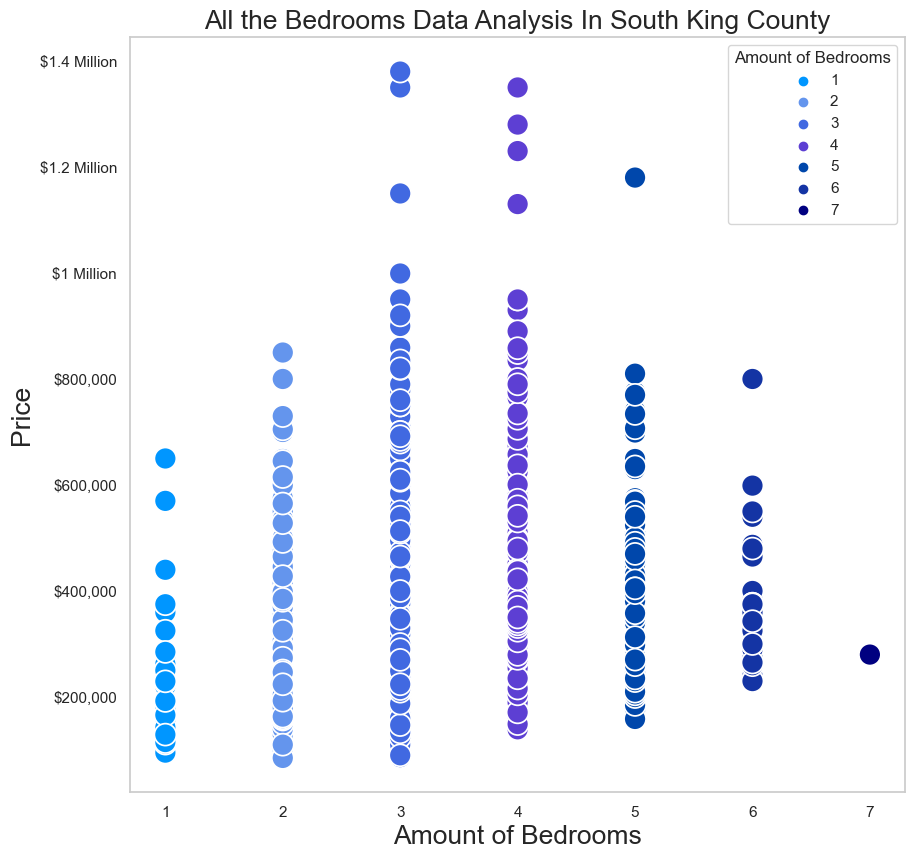

In [101]:
x = regressiondata1['Amount_of_Bedrooms']
y = regressiondata1['Price']
#plt.scatter(x,y, cmap = 'Reds',edgecolor = 'black',
            #linewidth = 1,alpha = .75,color='blue',s=250)

#plt.show()
#s:changes size,c:changes colour
sns.set(style='whitegrid')
flatui = ["#0096FF","#6495ED","#4169E1","#5D3FD3","#0047AB","#1434A4","#000080"]
sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata1, x=x, y=y,s=250,hue='Amount_of_Bedrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In South King County',size=19)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Bedrooms')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.show()

In [102]:
train_df, test_df = train_test_split(regressiondata1, test_size=0.10, shuffle=False)

In [103]:
X_train, y_train = train_df[['Amount_of_Bedrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bedrooms']], test_df[['Price']]

In [104]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [105]:
Quantile_regression = pd.DataFrame({'Amount_of_Bedrooms': X_test.reset_index()['Amount_of_Bedrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [106]:
Quantile_regression

,Amount_of_Bedrooms,0.1,0.5,0.9,Price
0,2,149941.436062,230001.434316,477999.238828,645000.0
1,2,149941.436062,230001.434316,477999.238828,299990.0
2,2,149941.436062,230001.434316,477999.238828,222200.0
3,2,149941.436062,230001.434316,477999.238828,309950.0
4,2,149941.436062,230001.434316,477999.238828,310000.0
...,...,...,...,...,...
436,1,149941.436062,230001.434316,477999.238828,375000.0
437,1,149941.436062,230001.434316,477999.238828,285000.0
438,1,149941.436062,230001.434316,477999.238828,570000.0
439,1,149941.436062,230001.434316,477999.238828,229500.0


In [107]:
melted_data = pd.melt(Quantile_regression, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.drop(range(1323,1764))

In [108]:
melted_data.head

<bound method NDFrame.head of       Amount_of_Bedrooms variable          value
0                      2      0.1  149941.436062
1                      2      0.1  149941.436062
2                      2      0.1  149941.436062
3                      2      0.1  149941.436062
4                      2      0.1  149941.436062
...                  ...      ...            ...
1318                   1      0.9  477999.238828
1319                   1      0.9  477999.238828
1320                   1      0.9  477999.238828
1321                   1      0.9  477999.238828
1322                   7      0.9  489188.926882

[1323 rows x 3 columns]>

In [109]:
df =pd.DataFrame({'Amount of Bedrooms':[1,2,3,4,5,6,7,1,2,3,4,5,6,7,1,2,3,4,5,6,7],
        'Percentile':[0.5,0.5,0.5,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.5,0.5,0.5,0.5,0.9,0.9,0.9,0.9,0.9,0.9,0.9],
'Value':[149941.436062,149941.436062,149941.436062,239719.095171,
                239719.095171,239719.095171,239719.095171,23001.434316,23001.434316,23001.434316,
                327998.831298,327998.831298,327998.831298,327998.831298,477999.238828,477999.238828,
                477999.238828,489188.926882,489188.926882,489188.926882,489188.926882]})
df.head(4)

,Amount of Bedrooms,Percentile,Value
0,1,0.5,149941.436062
1,2,0.5,149941.436062
2,3,0.5,149941.436062
3,4,0.1,239719.095171


<ipython-input-110-c7a04b5e94c4>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, -100000.0, '0'),
 Text(0, 0.0, '$0'),
 Text(0, 100000.0, '$100,000'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '')]

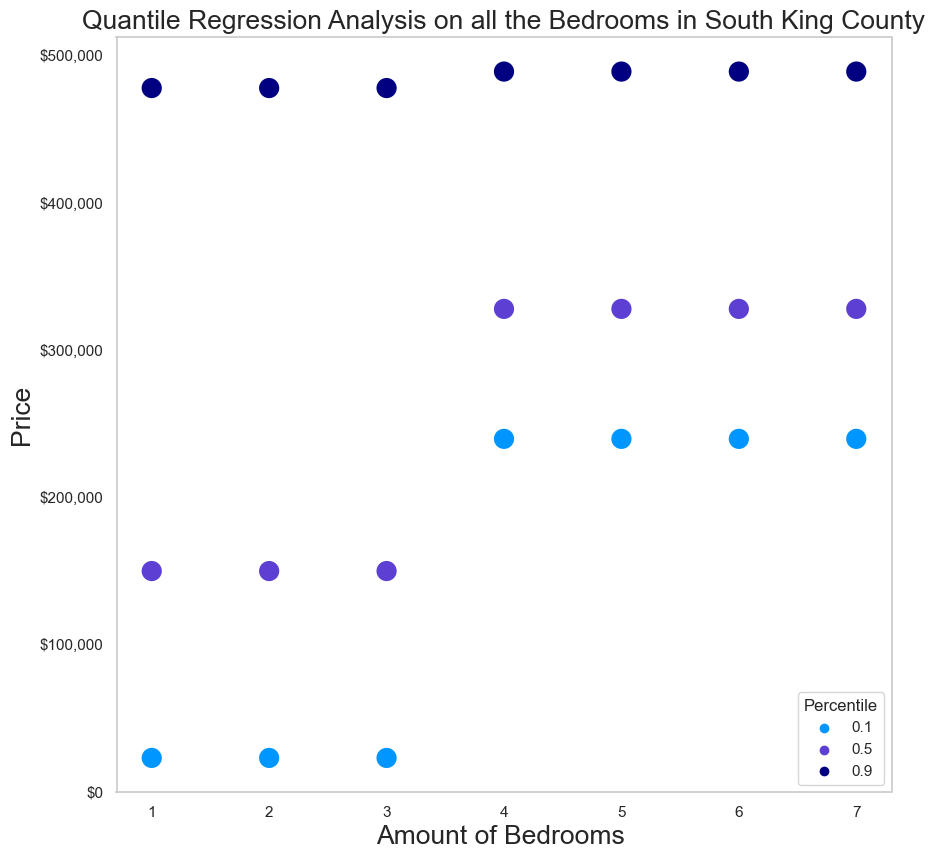

In [110]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#0096FF","#5D3FD3","#000080"]
ax = sns.scatterplot(data=df, x="Amount of Bedrooms", 
                     y='Value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis on all the Bedrooms in South King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$100,000','$200,000','$300,000','$400,000',
                         '$500,000'])

<ipython-input-111-cd4908deb2cb>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, -100000.0, '0'),
 Text(0, 0.0, '$0'),
 Text(0, 100000.0, '$100,000'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '')]

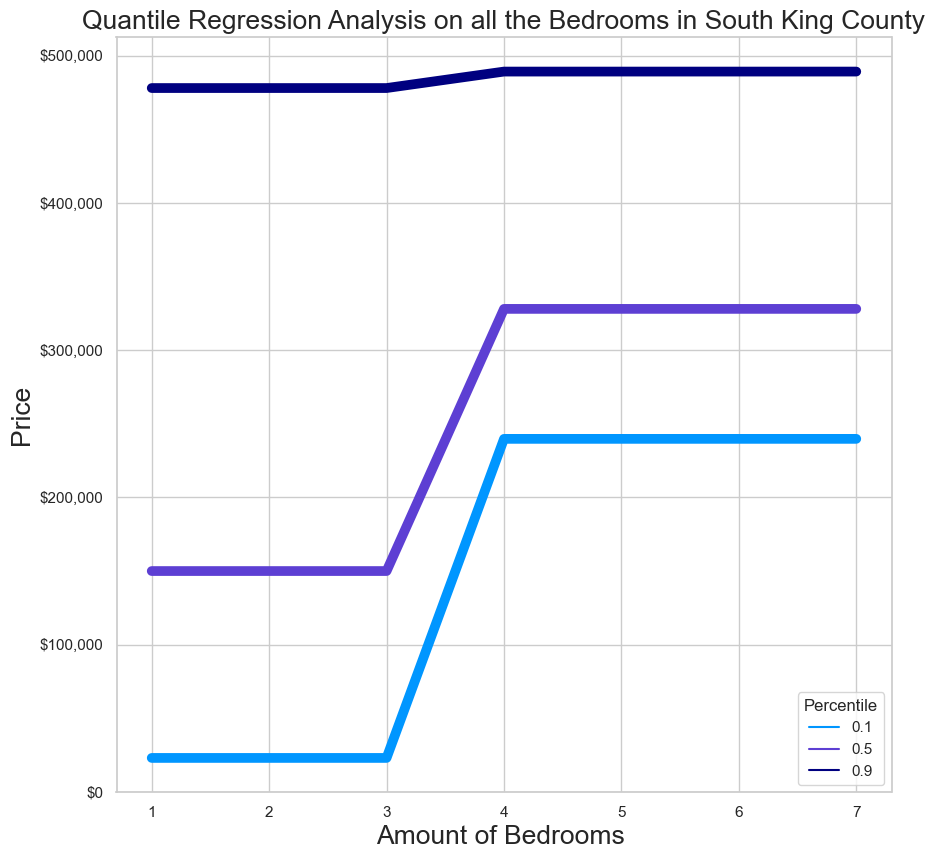

In [111]:
sns.set_style("whitegrid")
flatui = ["#0096FF","#5D3FD3","#000080"]
ax=sns.lineplot( x=[1,2,3,4,5,6,7,1,2,3,4,5,6,7,1,2,3,4,5,6,7],linewidth = 7,palette=flatui,
               hue=[0.5,0.5,0.5,0.1,0.1,0.1,
                                  0.1,0.1,0.1,0.1,0.5,0.5,0.5,0.5,0.9,0.9,0.9,0.9,0.9,0.9,0.9],
                y=[149941.436062,149941.436062,149941.436062,239719.095171,
                239719.095171,239719.095171,239719.095171,23001.434316,23001.434316,23001.434316,
                327998.831298,327998.831298,327998.831298,327998.831298,477999.238828,477999.238828,
                477999.238828,489188.926882,489188.926882,489188.926882,489188.926882 ])
plt.gcf().set_size_inches((10,10))
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bedrooms in South King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$100,000','$200,000','$300,000','$400,000',
                         '$500,000'])

In [112]:
(Quantile_regression['Price'] > Quantile_regression['0.1']).value_counts()

True     403
False     38
dtype: int64

In [113]:
i = 0
y= 0
x = []
while i < 403:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 38:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

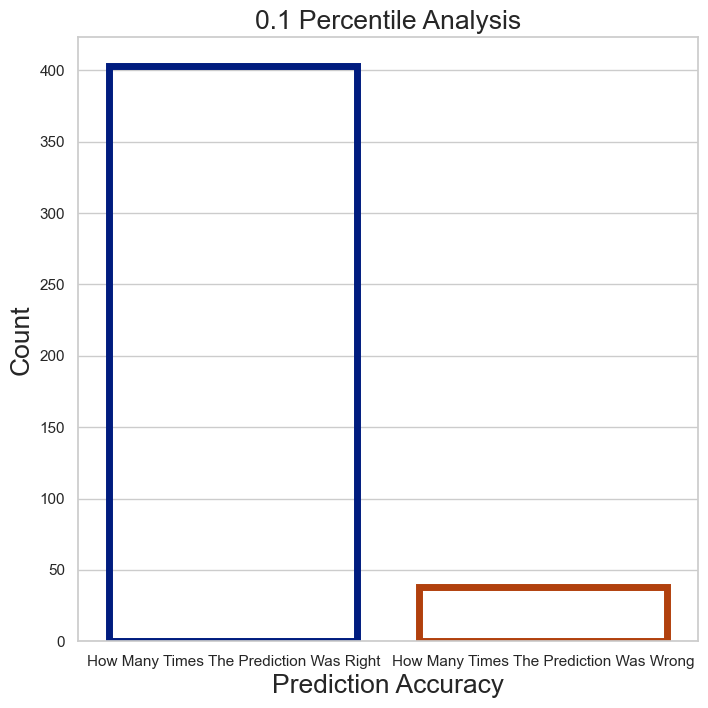

In [114]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [115]:
(Quantile_regression['Price'] > Quantile_regression['0.5']).value_counts()

True     228
False    213
dtype: int64

In [116]:
i = 0
y= 0
x = []
while i < 228:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 213:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df33 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

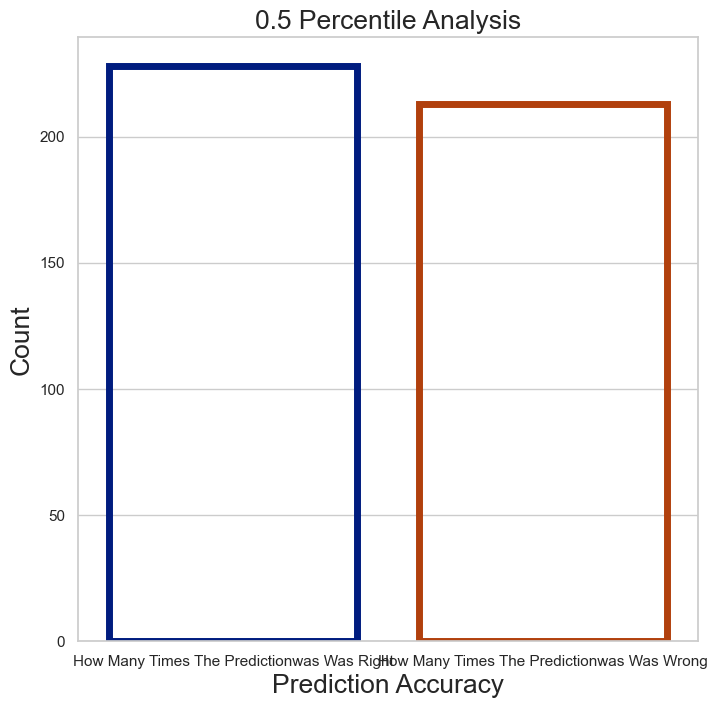

In [117]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df33,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [118]:
(Quantile_regression['Price'] > Quantile_regression['0.9']).value_counts()

False    390
True      51
dtype: int64

In [119]:
i = 0
y= 0
x = []
while i < 390:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 51:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df333 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

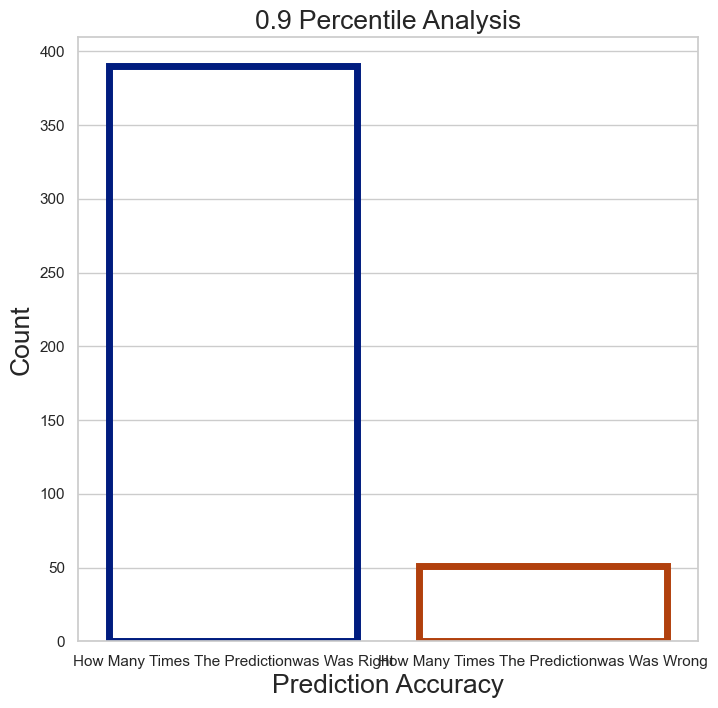

In [120]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df333,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [121]:
Predictions = []
for i in regressiondata1.Amount_of_Bedrooms:
    if i == 1 :Predictions.append('Between: $149,941 - $477,999')
    if i == 2: Predictions.append('Between: $149,941 - $477,999')
    if i == 3:Predictions.append('Between: $149,941 - $477,999')
    if i == 4:Predictions.append('Between: $239,719 - $489,188') 
    if i == 5:Predictions.append('Between: $239,719 - $489,188')
    if i ==6 :Predictions.append('Between: $239,719 - $489,188')
    if i == 7:Predictions.append('Between: $239,719 - $489,188')
len(Predictions)

4403

In [122]:
price = []
for i in regressiondata1.Price:
    price.append("${:,.0f}".format(i))

In [123]:
Prediction = pd.DataFrame({'Amount of Bedrooms':regressiondata1.Amount_of_Bedrooms,
                           'Prediction':Predictions,'Actual Price':price})
Prediction

,Amount of Bedrooms,Prediction,Actual Price
0,3,"Between: $149,941 - $477,999","$257,500"
1,3,"Between: $149,941 - $477,999","$291,850"
2,3,"Between: $149,941 - $477,999","$323,000"
3,3,"Between: $149,941 - $477,999","$230,000"
4,3,"Between: $149,941 - $477,999","$329,000"
...,...,...,...
4398,1,"Between: $149,941 - $477,999","$375,000"
4399,1,"Between: $149,941 - $477,999","$285,000"
4400,1,"Between: $149,941 - $477,999","$570,000"
4401,1,"Between: $149,941 - $477,999","$229,500"


In [124]:
def PRICE_BATHROOM(AMOUNT_BATHROOM):
    
    locations = house_info['Location'].tolist()

    amount_bath = house_info["Bathrooms"].tolist()

    bathroom_index = []
    for i,x in enumerate(amount_bath):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)
    len(bathroom_index)

    bathroom_southking = []
    for i in bathroom_index:
        if locations[i] == 98092 : bathroom_southking.append(i)
        elif locations[i] == 98002 : bathroom_southking.append(i)
        elif locations[i] == 98001 : bathroom_southking.append(i)
        elif locations[i] == 98070 : bathroom_southking.append(i)
        elif locations[i] == 98038 : bathroom_southking.append(i)
        elif locations[i] == 98023 : bathroom_southking.append(i)
        elif locations[i] == 98003 : bathroom_southking.append(i)
        elif locations[i] == 98010 : bathroom_southking.append(i)
        elif locations[i] == 98022 : bathroom_southking.append(i)
        elif locations[i] == 98198 : bathroom_southking.append(i)
        elif locations[i] == 98188 : bathroom_southking.append(i)
        elif locations[i] == 98148 : bathroom_southking.append(i)
        elif locations[i] == 98042 : bathroom_southking.append(i)
        elif locations[i] == 98032 : bathroom_southking.append(i)
        elif locations[i] == 98031 : bathroom_southking.append(i)
        elif locations[i] == 98030 : bathroom_southking.append(i)

    price = house_info["Price"].tolist()

    price_southking = []
    for i in bathroom_southking:price_southking.append(price[i])
    return(price_southking)

no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
price_bathroom_southking = []
for i in no_of_bathrooms:
    price_bathroom_southking.append(PRICE_BATHROOM(i))
price_bathroom_southking = sum(price_bathroom_southking, [])
price_bathroom_southking

[323000.0,
 285000.0,
 1350000.0,
 292500.0,
 301000.0,
 287000.0,
 360000.0,
 720000.0,
 390000.0,
 360000.0,
 243500.0,
 480000.0,
 260000.0,
 256883.0,
 297000.0,
 465000.0,
 472000.0,
 363000.0,
 245000.0,
 290000.0,
 272500.0,
 365000.0,
 455000.0,
 370000.0,
 360000.0,
 335000.0,
 208633.0,
 390000.0,
 260000.0,
 300000.0,
 329500.0,
 322500.0,
 268000.0,
 245000.0,
 325000.0,
 342500.0,
 328500.0,
 295000.0,
 270500.0,
 331500.0,
 338900.0,
 266000.0,
 296000.0,
 260000.0,
 305000.0,
 609900.0,
 320000.0,
 530000.0,
 390000.0,
 289950.0,
 347500.0,
 360000.0,
 405000.0,
 370000.0,
 310950.0,
 332000.0,
 265000.0,
 280000.0,
 289999.0,
 395000.0,
 324000.0,
 288400.0,
 378000.0,
 253000.0,
 469500.0,
 291000.0,
 325000.0,
 321500.0,
 315000.0,
 380000.0,
 515000.0,
 367000.0,
 350900.0,
 298900.0,
 305000.0,
 254000.0,
 245000.0,
 320000.0,
 350000.0,
 295700.0,
 390000.0,
 302495.0,
 470000.0,
 325000.0,
 375000.0,
 556000.0,
 620000.0,
 585000.0,
 303700.0,
 267000.0,
 292000.0

In [125]:
def AMOUNT_BATHROOMS(AMOUNT_BATHROOM):
    locations = house_info['Location'].tolist()

    amount_bed = house_info["Bathrooms"].tolist()
    X_value = []
    bathroom_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)

    for i in bathroom_index:
        if locations[i] == 98092 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98002 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98001 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98070 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98038 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98023 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98003 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98010 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98022 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98198: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98188 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98148 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98042 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98032 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98031 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98030 : X_value.append(AMOUNT_BATHROOM)
    return X_value
no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
amount_bathrooms_southking = []
for i in no_of_bathrooms:
    amount_bathrooms_southking.append(AMOUNT_BATHROOMS(i))
amount_bathrooms_southking= sum(amount_bathrooms_southking, [])
len(amount_bathrooms_southking)

4403

In [126]:
regressiondata2 = pd.DataFrame({'Amount_of_Bathrooms':amount_bathrooms_southking,
                                'Price':price_bathroom_southking})
regressiondata2

,Amount_of_Bathrooms,Price
0,2.50,323000.0
1,2.50,285000.0
2,2.50,1350000.0
3,2.50,292500.0
4,2.50,301000.0
...,...,...
4398,5.00,784500.0
4399,5.00,480000.0
4400,5.00,343000.0
4401,5.25,300000.0


<ipython-input-127-73de9f56039c>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



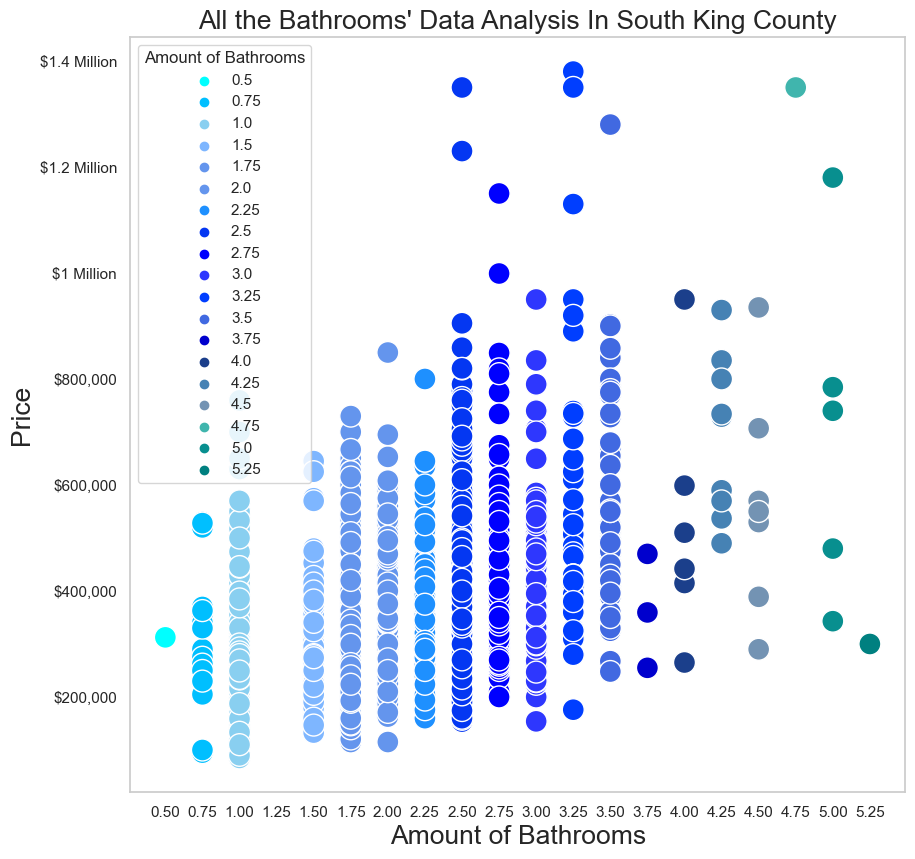

In [127]:
x = regressiondata2['Amount_of_Bathrooms']
y = regressiondata2['Price']
flatui = ["#00FFFF","#00bfff","#89CFF0","#7EB6FF","#6495ED",
          "#6495ed","#1E90FF","#0437F2","#0000FF","#2E37FE","#003EFF",
          "#4169E1","#0000CD","#1B3F8B","#4682B4","#7393B3","#40B5AD","#088F8F","#008080"]
sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata2, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Bathrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bathrooms\' Data Analysis In South King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.legend(title='Amount of Bathrooms')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.xticks(np.arange(0.5,5.5,0.25))
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()

plt.show()

In [128]:
train_df, test_df = train_test_split(regressiondata2, test_size=0.10, shuffle=False)

In [129]:
X_train, y_train = train_df[['Amount_of_Bathrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bathrooms']], test_df[['Price']]

In [130]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [131]:
Quantile_regression1 = pd.DataFrame({'Amount_of_Bathrooms': X_test.reset_index()['Amount_of_Bathrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [132]:
Quantile_regression1

,Amount_of_Bathrooms,0.1,0.5,0.9,Price
0,2.75,252542.224870,344998.207106,537396.864270,307000.0
1,2.75,252542.224870,344998.207106,537396.864270,329000.0
2,2.75,252542.224870,344998.207106,537396.864270,600000.0
3,2.75,252542.224870,344998.207106,537396.864270,323000.0
4,2.75,252542.224870,344998.207106,537396.864270,200000.0
...,...,...,...,...,...
436,5.00,252542.224870,344998.207106,537396.864270,784500.0
437,5.00,252542.224870,344998.207106,537396.864270,480000.0
438,5.00,252542.224870,344998.207106,537396.864270,343000.0
439,5.25,252542.224870,344998.207106,537396.864270,300000.0


In [133]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bathrooms':[2.50,1.00,1.75,2.25,2.00,1.50,2.75,   
3.00,3.50,3.25,3.75,4.00,4.50,4.25,0.75,4.75,5.00,5.25,1.25,0.50 ],
    '0.1':[150001.290355,150001.290355,150001.290355,150001.290355,150001.290355,
                             150001.290355,252542.224870,252542.224870,252542.224870,252542.224870,
                             252542.224870,252542.224870,252542.224870,252542.224870,150001.290355,
                             252542.224870,252542.224870,252542.224870,150001.290355,150001.290355],
'0.5':[209001.819456,209001.819456,209001.819456,209001.819456,209001.819456,209001.819456,
      344998.207106,344998.207106,344998.207106,344998.207106,344998.207106,344998.207106,
       344998.207106,344998.207106,209001.819456,344998.207106,344998.207106,344998.207106,
       209001.819456,209001.819456],
'0.9':[287968.850069,287968.850069,287968.850069,287968.850069,287968.850069,287968.850069,
      537396.864270,537396.864270,537396.864270,537396.864270,537396.864270,537396.864270,
       537396.864270,537396.864270,287968.850069,537396.864270,537396.864270,537396.864270,
      287968.850069,287968.850069]})
Quantileregression_updated

,Amount_of_Bathrooms,0.1,0.5,0.9
0,2.50,150001.290355,209001.819456,287968.850069
1,1.00,150001.290355,209001.819456,287968.850069
2,1.75,150001.290355,209001.819456,287968.850069
3,2.25,150001.290355,209001.819456,287968.850069
4,2.00,150001.290355,209001.819456,287968.850069
5,1.50,150001.290355,209001.819456,287968.850069
6,2.75,252542.224870,344998.207106,537396.864270
7,3.00,252542.224870,344998.207106,537396.864270
8,3.50,252542.224870,344998.207106,537396.864270
9,3.25,252542.224870,344998.207106,537396.864270


In [134]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bathrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data.head(5)

,Amount_of_Bathrooms,Percentile,value
0,2.50,0.1,150001.290355
1,1.00,0.1,150001.290355
2,1.75,0.1,150001.290355
3,2.25,0.1,150001.290355
4,2.00,0.1,150001.290355


<ipython-input-135-4d4593515183>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



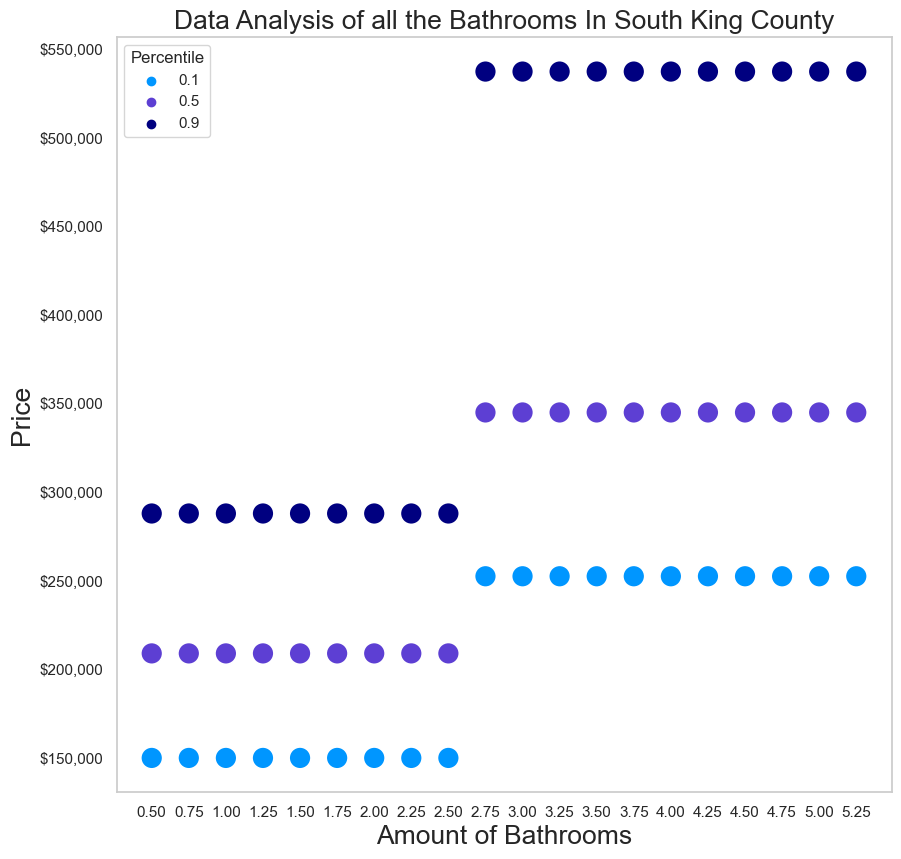

In [135]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#0096FF","#5D3FD3","#000080",]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Bathrooms",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.xticks(np.arange(0.5,5.5,0.25))           
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Bathrooms In South King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
                         '$400,000','$450,000','$500,000','$550,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Bathrooms")
plt.gcf().set_size_inches((10,10))

<ipython-input-136-62800b5a7264>:28: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 100000.0, '0'),
 Text(0, 150000.0, '$150,000'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 250000.0, '$250,000'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 350000.0, '$350,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 450000.0, '$450,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 550000.0, '$550,000'),
 Text(0, 600000.0, '')]

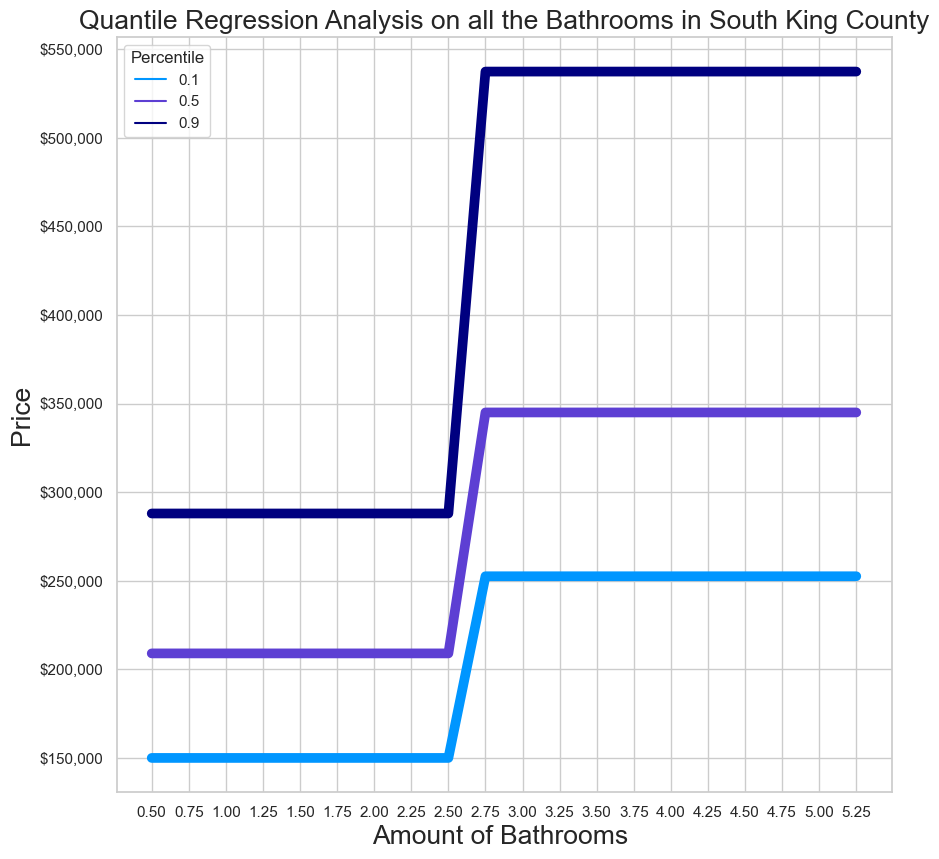

In [136]:
sns.set_style("whitegrid")
flatui = ["#0096FF","#5D3FD3","#000080"]
ax=sns.lineplot( x=[0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,   
3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,   
3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,   
3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25],linewidth = 7,palette=flatui,
               hue=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
                    0.1,0.1,0.1,0.1,0.1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,
                   0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.9,0.9,0.9,0.9,0.9,
                   0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9],
                y=[150001.290355,150001.290355,150001.290355,150001.290355,150001.290355,
                   150001.290355,150001.290355,150001.290355,150001.290355,252542.224870,
                  252542.224870,252542.224870,252542.224870,252542.224870,252542.224870,
                   252542.224870,252542.224870,252542.224870,252542.224870,252542.224870,
                  209001.819456,209001.819456,209001.819456,209001.819456,209001.819456,209001.819456,
                  209001.819456,209001.819456,209001.819456,344998.207106,344998.207106,
                  344998.207106,344998.207106,344998.207106,344998.207106,344998.207106,344998.207106,
                  344998.207106,344998.207106,344998.207106,287968.850069,287968.850069,287968.850069,
                  287968.850069,287968.850069,287968.850069,287968.850069,287968.850069,287968.850069,
                  537396.864270,537396.864270,537396.864270,537396.864270,537396.864270,537396.864270,
                   537396.864270,537396.864270,537396.864270,537396.864270,537396.864270])
plt.gcf().set_size_inches((10,10))
plt.xticks(np.arange(0.5,5.5,0.25))  
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bathrooms in South King County',size=19)
plt.xlabel("Amount of Bathrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
                         '$400,000','$450,000','$500,000','$550,000'])

In [137]:
(Quantile_regression1['Price'] > Quantile_regression['0.1']).value_counts()

True     431
False     10
dtype: int64

In [138]:
i = 0
y= 0
x = []
while i < 431:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 10:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

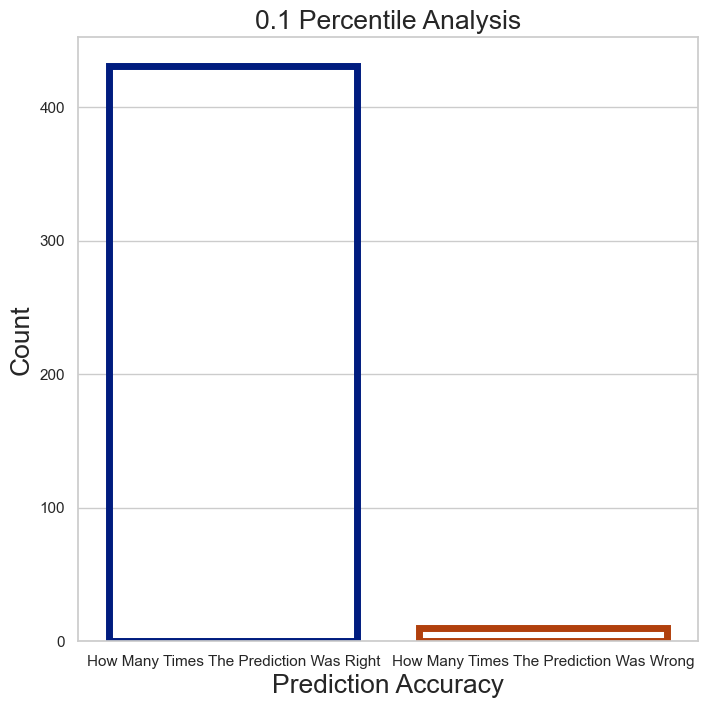

In [139]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [140]:
(Quantile_regression1['Price'] > Quantile_regression['0.5']).value_counts()

True     387
False     54
dtype: int64

In [141]:
i = 0
y= 0
x = []
while i < 387:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 54:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

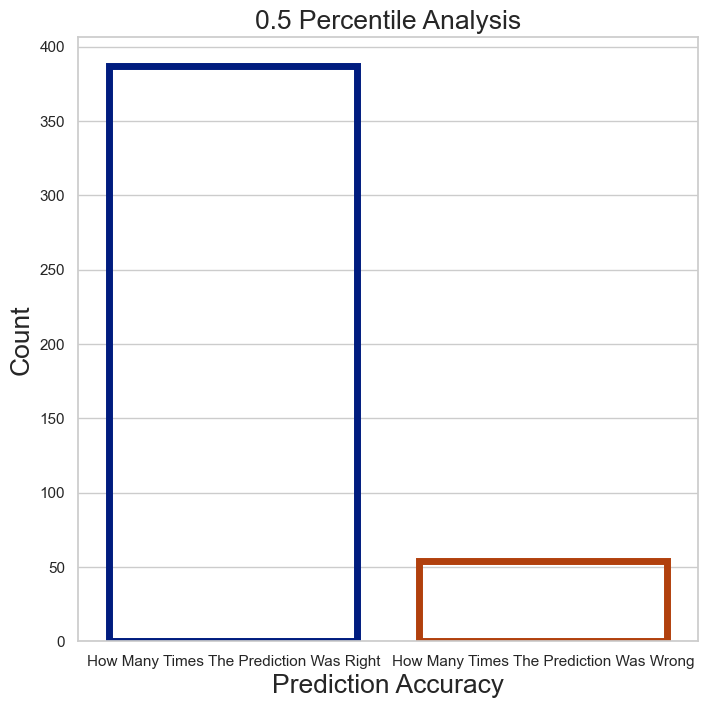

In [142]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [143]:
(Quantile_regression1['Price'] > Quantile_regression['0.9']).value_counts()

False    307
True     134
dtype: int64

In [144]:
i = 0
y= 0
x = []
while i < 307:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 134:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

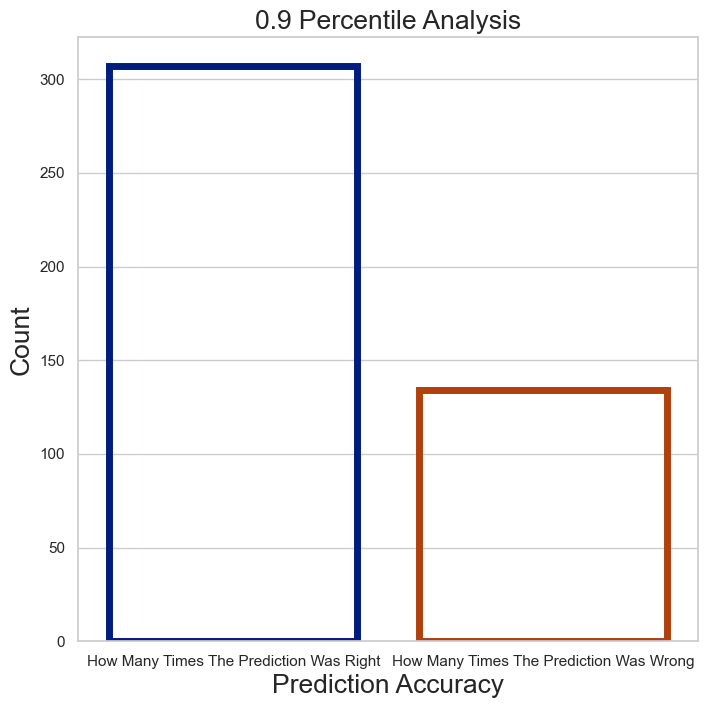

In [145]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [146]:
def PRICE_FLOORS(AMOUNT_FLOORS):
    
    locations = house_info['Location'].tolist()

    amount_floors = house_info['Floors'].tolist()

    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
    len(floors_index)

    floors_southking = []
    for i in floors_index:
        if locations[i] == 98092 : floors_southking.append(i)
        elif locations[i] == 98002 : floors_southking.append(i)
        elif locations[i] == 98001 : floors_southking.append(i)
        elif locations[i] == 98070 : floors_southking.append(i)
        elif locations[i] == 98038 : floors_southking.append(i)
        elif locations[i] == 98023 : floors_southking.append(i)
        elif locations[i] == 98003 : floors_southking.append(i)
        elif locations[i] == 98010 : floors_southking.append(i)
        elif locations[i] == 98022 : floors_southking.append(i)
        elif locations[i] == 98198 : floors_southking.append(i)
        elif locations[i] == 98188 : floors_southking.append(i)
        elif locations[i] == 98148 : floors_southking.append(i)
        elif locations[i] == 98042 : floors_southking.append(i)
        elif locations[i] == 98032 : floors_southking.append(i)
        elif locations[i] == 98031 : floors_southking.append(i)
        elif locations[i] == 98030 : floors_southking.append(i)

    price = house_info["Price"].tolist()

    price_southking = []
    for i in floors_southking:price_southking.append(price[i])
    return(price_southking)

no_of_floors = house_info["Floors"].value_counts().index.tolist()
price_floors_southking = []
for i in no_of_floors:
    price_floors_southking.append(PRICE_FLOORS(i))
price_floors_southking = sum(price_floors_southking, [])
len(price_floors_southking)

4403

In [147]:
def AMOUNT_FLOORS(AMOUNT_FLOORS):
    locations = house_info['Location'].tolist()

    amount_floors = house_info["Floors"].tolist()
    X_value = []
    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)

    for i in floors_index:
        if locations[i] == 98092 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98002 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98001 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98070 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98038 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98023 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98003 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98010 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98022 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98198: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98188 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98148 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98042 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98032 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98031 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98030 : X_value.append(AMOUNT_FLOORS)
    return X_value
no_of_floors = house_info["Floors"].value_counts().index.tolist()
amount_floors_southking = []
for i in no_of_floors:
    amount_floors_southking.append(AMOUNT_FLOORS(i))
amount_floors_southking= sum(amount_floors_southking, [])
len(amount_floors_southking)

4403

In [148]:
regressiondata3 = pd.DataFrame({'Amount_of_Floors':amount_floors_southking,
                                'Price':price_floors_southking})
regressiondata3

,Amount_of_Floors,Price
0,1.0,291850.0
1,1.0,189000.0
2,1.0,230000.0
3,1.0,252700.0
4,1.0,240000.0
...,...,...
4398,2.5,325000.0
4399,2.5,345000.0
4400,2.5,429900.0
4401,2.5,552900.0


<ipython-input-149-5da0c8f60b6e>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



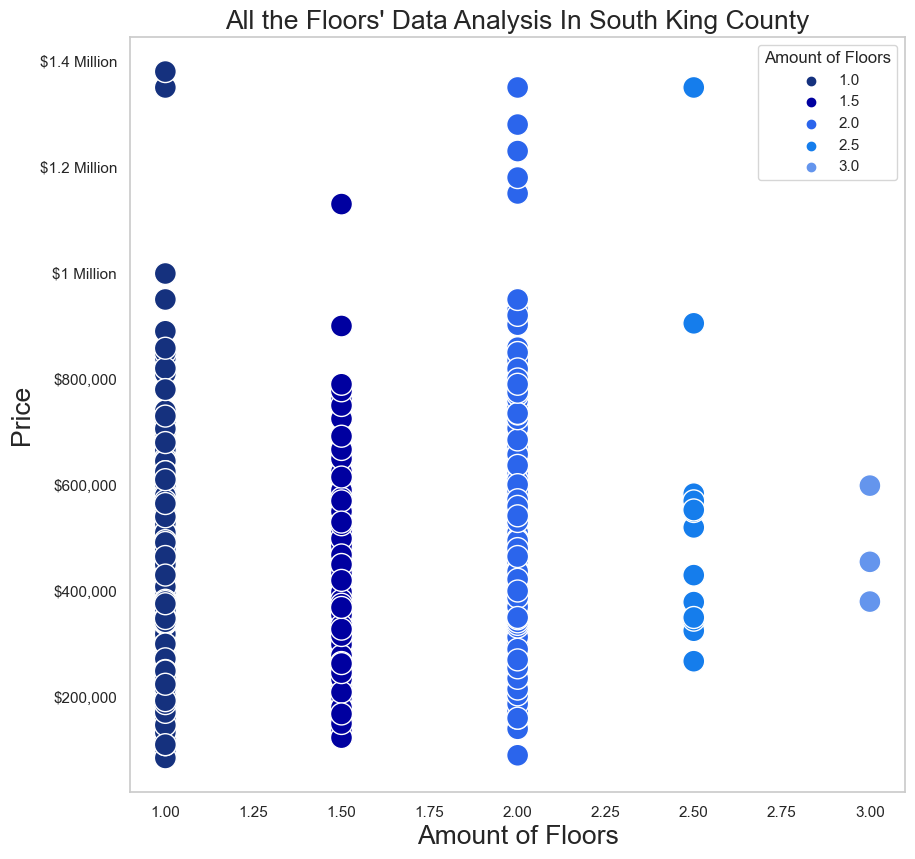

In [149]:
x = regressiondata3['Amount_of_Floors']
y = regressiondata3['Price']
flatui = ['#15317E','#0000A0','#2B65EC','#157DEC','#6495ED']
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata3, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Floors',
                     palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Amount of Floors", size=19)
plt.legend(title='Amount of Floors')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [473]:
train_df, test_df = train_test_split(regressiondata3, test_size=0.10, shuffle=False)

In [474]:
X_train, y_train = train_df[['Amount_of_Floors']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Floors']], test_df[['Price']]

In [475]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [476]:
Quantile_regression2 = pd.DataFrame({'Amount_of_Floors': X_test.reset_index()['Amount_of_Floors'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [479]:
Quantile_regression2

,Amount_of_Floors,0.1,0.5,0.9,Price
0,2.0,249998.670602,329998.685211,510198.364715,342000.0
1,2.0,249998.670602,329998.685211,510198.364715,367899.0
2,2.0,249998.670602,329998.685211,510198.364715,279000.0
3,2.0,249998.670602,329998.685211,510198.364715,310000.0
4,2.0,249998.670602,329998.685211,510198.364715,274000.0
...,...,...,...,...,...
436,2.5,249998.670602,329998.685211,510198.364715,325000.0
437,2.5,249998.670602,329998.685211,510198.364715,345000.0
438,2.5,249998.670602,329998.685211,510198.364715,429900.0
439,2.5,249998.670602,329998.685211,510198.364715,552900.0


In [500]:
melted_data = pd.melt(Quantile_regression2, id_vars=['Amount_of_Floors'])
melted_data = melted_data.dropna()
melted_data = melted_data.drop(range(1323,1764))
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Amount_of_Floors,Percentile,value
0,2.0,0.1,249998.670602
1,2.0,0.1,249998.670602
2,2.0,0.1,249998.670602
3,2.0,0.1,249998.670602
4,2.0,0.1,249998.670602
...,...,...,...
1318,2.5,0.9,510198.364715
1319,2.5,0.9,510198.364715
1320,2.5,0.9,510198.364715
1321,2.5,0.9,510198.364715


<ipython-input-482-bfadb8f0368a>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



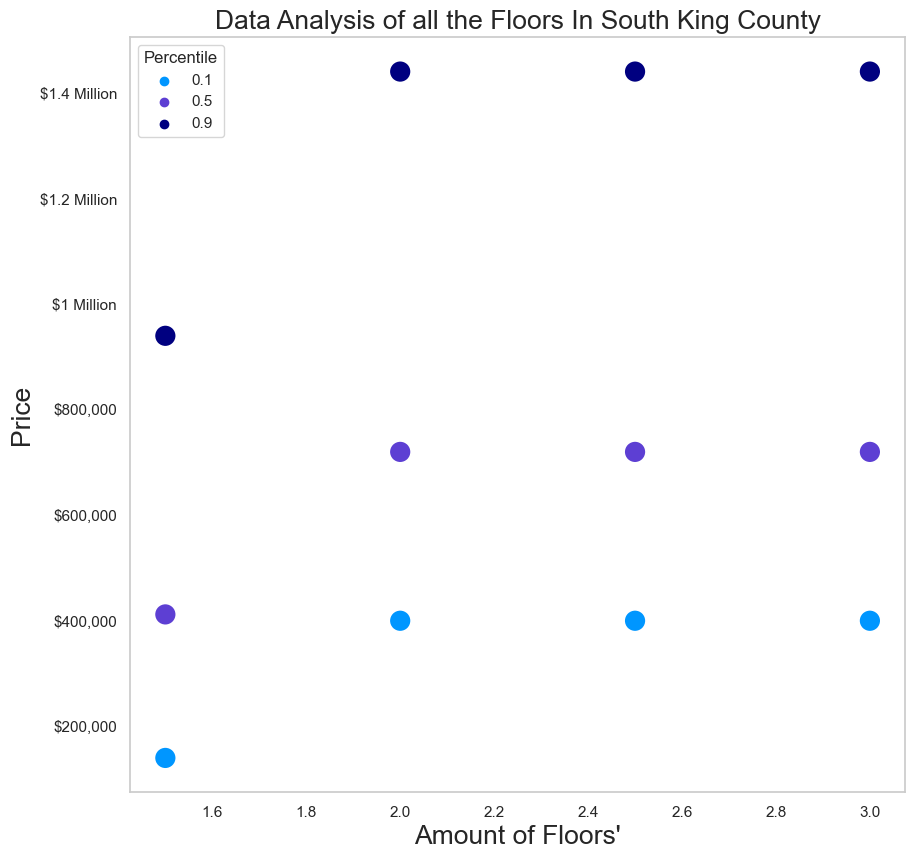

In [482]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#0096FF","#5D3FD3","#000080",]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Floors",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Floors In South King County',size=19)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Floors'")
plt.gcf().set_size_inches((10,10))

In [501]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Floors':[1.00,1.50,2.00,2.50,3.00],
    '0.1':[185000.397093,185000.397093,249998.670602,249998.670602,249998.670602],
'0.5':[253000.730438,253000.730438,329998.685211,329998.685211,329998.685211],
'0.9':[385001.723771,385001.723771,510198.364715,510198.364715,510198.364715]})
Quantileregression_updated

,Amount_of_Floors,0.1,0.5,0.9
0,1.0,185000.397093,253000.730438,385001.723771
1,1.5,185000.397093,253000.730438,385001.723771
2,2.0,249998.670602,329998.685211,510198.364715
3,2.5,249998.670602,329998.685211,510198.364715
4,3.0,249998.670602,329998.685211,510198.364715


In [503]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Floors'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Amount_of_Floors,Percentile,value
0,1.0,0.1,185000.397093
1,1.5,0.1,185000.397093
2,2.0,0.1,249998.670602
3,2.5,0.1,249998.670602
4,3.0,0.1,249998.670602
5,1.0,0.5,253000.730438
6,1.5,0.5,253000.730438
7,2.0,0.5,329998.685211
8,2.5,0.5,329998.685211
9,3.0,0.5,329998.685211


<ipython-input-513-3c056bf717fd>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



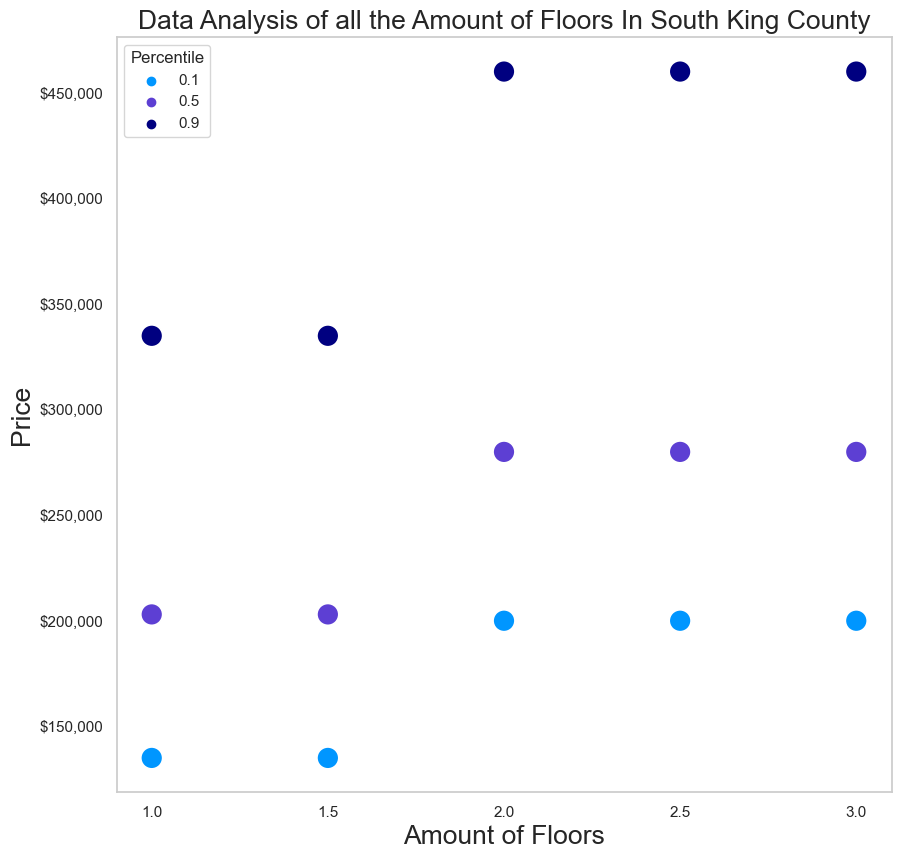

In [513]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#0096FF","#5D3FD3","#000080",]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Floors",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.xticks(np.arange(1.0,3.5,0.50))           
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Floors In South King County',size=19)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
                         '$400,000','$450,000','$500,000','$550,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Floors")
plt.gcf().set_size_inches((10,10))

<ipython-input-512-bf7c0e7a049b>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 150000.0, '0'),
 Text(0, 200000.0, '$150,000'),
 Text(0, 250000.0, '$200,000'),
 Text(0, 300000.0, '$250,000'),
 Text(0, 350000.0, '$300,000'),
 Text(0, 400000.0, '$350,000'),
 Text(0, 450000.0, '$400,000'),
 Text(0, 500000.0, '$450,000'),
 Text(0, 550000.0, '$500,000')]

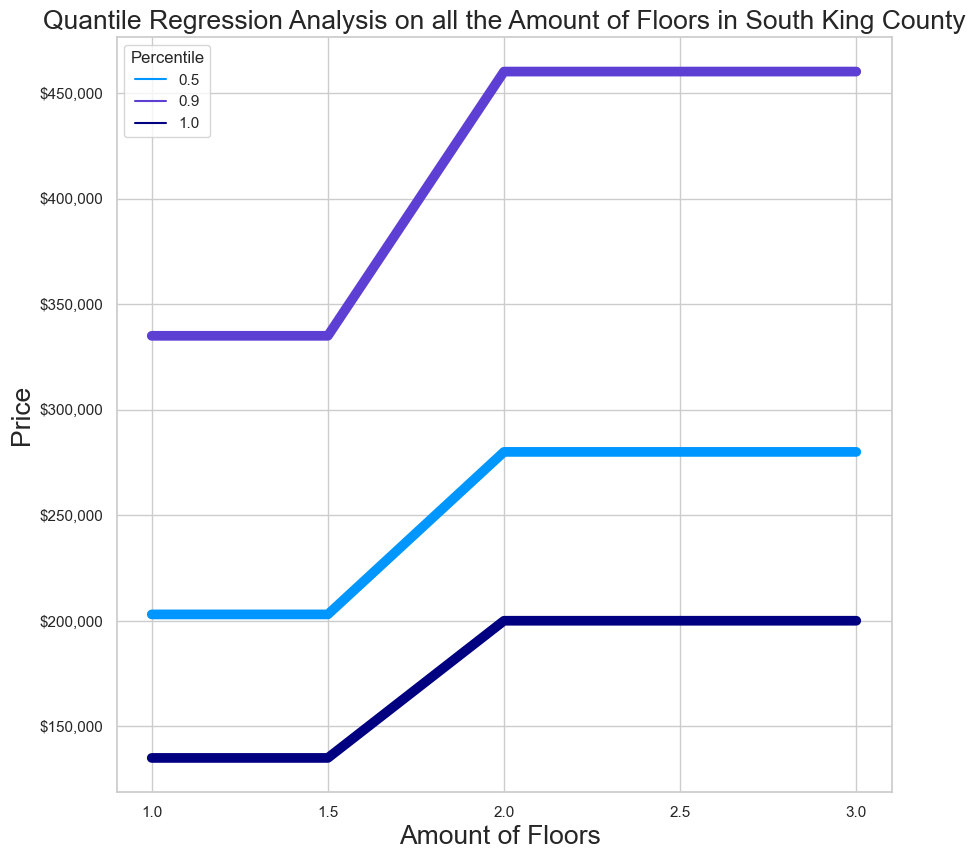

In [512]:
sns.set_style("whitegrid")
flatui = ["#0096FF","#5D3FD3","#000080"]
ax=sns.lineplot( x=[1.00,1.50,2.00,2.50,3.00,1.00,1.50,2.00,2.50,3.00,1.00,1.50,2.00,2.50,3.00],
                linewidth = 7,palette=flatui,
               hue=[1.0,1.0,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.9,0.9,0.9,0.9,0.9],
                y=[185000.397093,185000.397093,249998.670602,249998.670602,249998.670602,
                  253000.730438,253000.730438,329998.685211,329998.685211,329998.685211,
                  385001.723771,385001.723771,510198.364715,510198.364715,510198.364715])
plt.gcf().set_size_inches((10,10))
plt.xticks(np.arange(1.0,3.5,0.50))  
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Amount of Floors in South King County',size=19)
plt.xlabel("Amount of Floors ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$150,000','$200,000','$250,000','$300,000','$350,000',
                         '$400,000','$450,000','$500,000','$550,000'])

In [515]:
(Quantile_regression2['Price'] > Quantile_regression['0.1']).value_counts()

True     368
False     73
dtype: int64

In [520]:
i = 0
y= 0
x = []
while i < 368:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 73:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

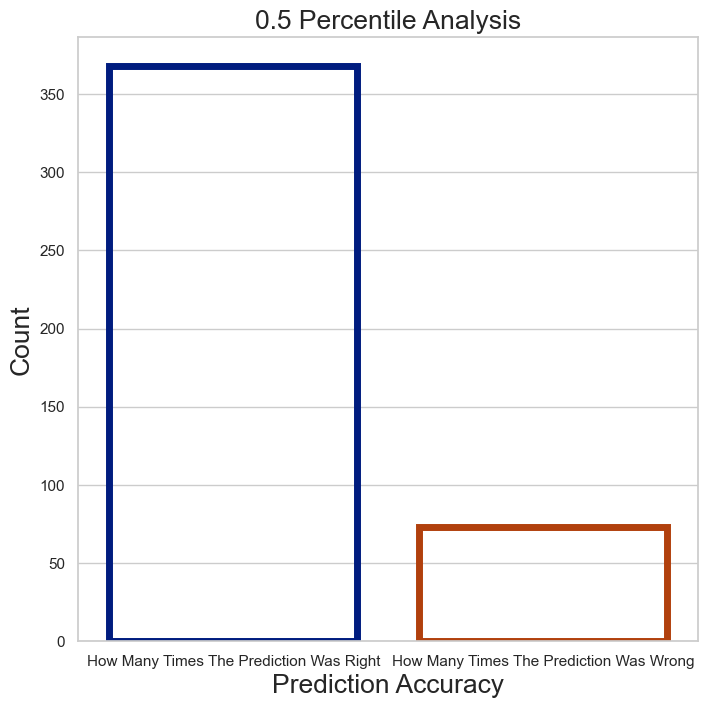

In [521]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [522]:
(Quantile_regression2['Price'] > Quantile_regression['0.5']).value_counts()

True     278
False    163
dtype: int64

In [523]:
i = 0
y= 0
x = []
while i < 278:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 163:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

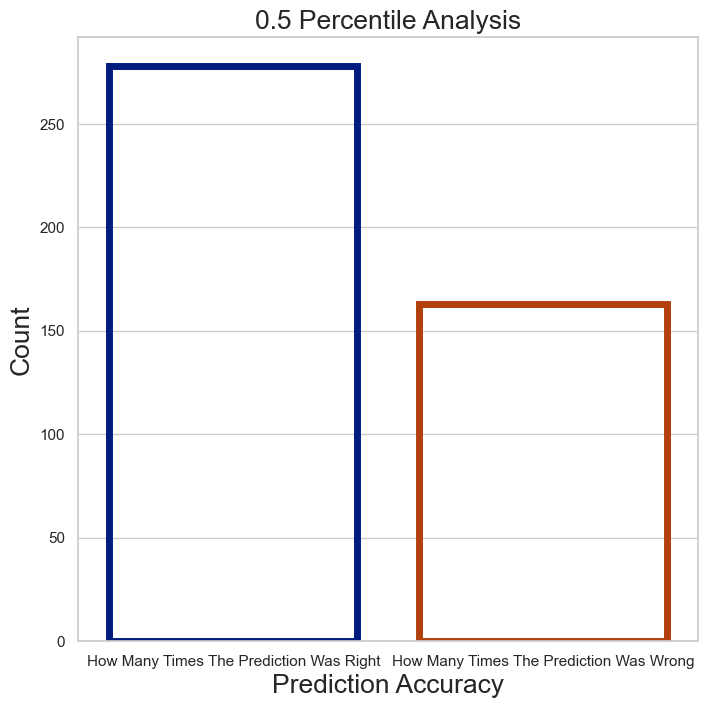

In [524]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [525]:
(Quantile_regression2['Price'] > Quantile_regression['0.9']).value_counts()

False    382
True      59
dtype: int64

In [526]:
i = 0
y= 0
x = []
while i < 382:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 59:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

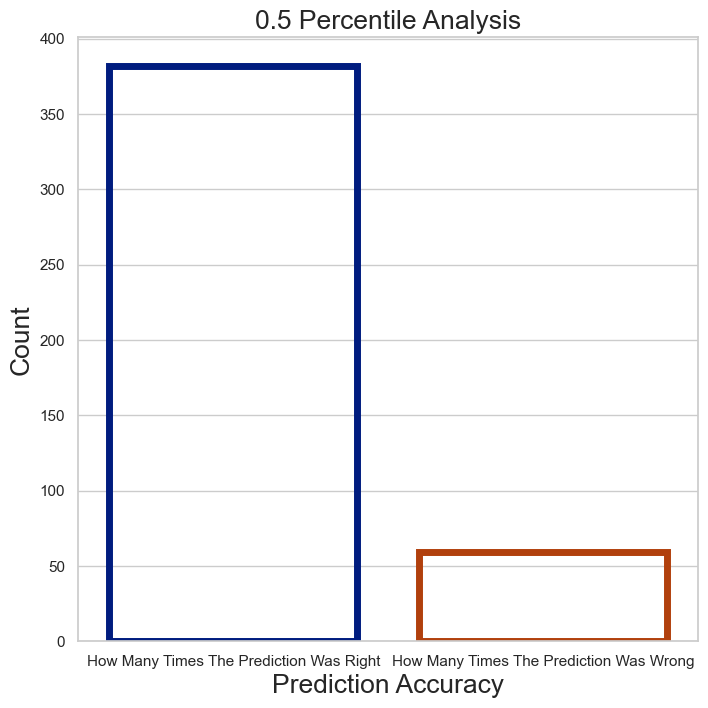

In [527]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [157]:
def PRICE_YEARS_BUILT(YEAR_BUILT):
    
    locations = house_info['Location'].tolist()

    year_built = house_info['Year Built'].tolist()

    years_built_index = []
    for i,x in enumerate(year_built):
        if x == YEAR_BUILT:years_built_index.append(i)

    years_built_southking = []
    for i in years_built_index:
        if locations[i] == 98092 : years_built_southking.append(i)
        elif locations[i] == 98002 : years_built_southking.append(i)
        elif locations[i] == 98001 : years_built_southking.append(i)
        elif locations[i] == 98070 : years_built_southking.append(i)
        elif locations[i] == 98038 : years_built_southking.append(i)
        elif locations[i] == 98023 : years_built_southking.append(i)
        elif locations[i] == 98003 : years_built_southking.append(i)
        elif locations[i] == 98010 : years_built_southking.append(i)
        elif locations[i] == 98022 : years_built_southking.append(i)
        elif locations[i] == 98198 : years_built_southking.append(i)
        elif locations[i] == 98188 : years_built_southking.append(i)
        elif locations[i] == 98148 : years_built_southking.append(i)
        elif locations[i] == 98042 : years_built_southking.append(i)
        elif locations[i] == 98032 : years_built_southking.append(i)
        elif locations[i] == 98031 : years_built_southking.append(i)
        elif locations[i] == 98030 : years_built_southking.append(i)

    price = house_info["Price"].tolist()

    price_southking = []
    for i in years_built_southking:price_southking.append(price[i])
    return(price_southking)

no_of_Year = house_info["Year Built"].value_counts().index.tolist()
price_Year_southking = []
for i in no_of_Year:
    price_Year_southking.append(PRICE_YEARS_BUILT(i))
price_Year_southking = sum(price_Year_southking, [])
len(price_Year_southking)

4403

In [158]:
def AMOUNT_YEARS_BUILT(AMOUNT_YEARS):
    locations = house_info['Location'].tolist()

    years_built = house_info["Year Built"].tolist()
    X_value = []
    years_index = []
    for i,x in enumerate(years_built):
        if x == AMOUNT_YEARS:years_index.append(i)

    for i in years_index:
        if locations[i] == 98092 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98002 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98001 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98070 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98038 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98023 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98003 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98010 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98022 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98198: X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98188 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98148 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98042 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98032 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98031 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98030 : X_value.append(AMOUNT_YEARS)
    return X_value
no_of_years = house_info["Year Built"].value_counts().index.tolist()
amount_years_southking = []
for i in no_of_years:
    amount_years_southking.append(AMOUNT_YEARS_BUILT(i))
amount_years_southking= sum(amount_years_southking, [])
len(amount_years_southking)

4403

In [159]:
regressiondata4 = pd.DataFrame({'Year_Built':amount_years_southking,
                                'Price':price_Year_southking})
regressiondata4

,Year_Built,Price
0,2014,379000.0
1,2014,569950.0
2,2014,255000.0
3,2014,600600.0
4,2014,329900.0
...,...,...
4398,1935,285000.0
4399,1935,199990.0
4400,1934,217000.0
4401,1934,510000.0


In [264]:
reg1,year1 = [],[]
for i,x in enumerate(amount_years_southking):
    if x == 1900:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1901:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1902:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1903:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1904:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1905:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1906:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1907:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1908:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1909:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1910:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1911:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1912:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1913:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1914:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1915:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1916:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1917:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1918:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1919:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1920:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1921:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1922:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1923:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1924:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1925:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1926:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1927:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1928:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1929:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1930:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1931:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1932:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1933:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if i == 1934:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1935:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1936:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1937:
        reg1.append(price_Year_southking[i])
        year1.append(x)
reg1.remove(420000.0)
year1.remove(1999)

In [271]:
regressiondata44 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
#for i,x in enumerate(regressiondata44['Year_Built'].value_counts()):
    #print(i,x)

In [163]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_southking):
    if x == 1938:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1939:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1940:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1941:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1942:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1943:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1944:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1945:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1946:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1947:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1948:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1949:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1950:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1951:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1952:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1953:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1954:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1955:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1956:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1957:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1958:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1959:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1960:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1961:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1962:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1963:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1964:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1965:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1966:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1967:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1968:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1969:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1970:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1971:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if i == 1972:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1973:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1974:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1975:
        reg1.append(price_Year_southking[i])
        year1.append(x)
reg1.remove(334950.0)
year1.remove(1999)       

In [164]:
regressiondata45 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata45

,Year_Built,Price
0,1968,204000.0
1,1968,220000.0
2,1968,225000.0
3,1968,232000.0
4,1968,250000.0
...,...,...
1408,1938,294000.0
1409,1938,245000.0
1410,1938,389000.0
1411,1938,485000.0


In [176]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_southking):
    if x == 1976:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1977:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1978:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1979:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1980:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1981:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1982:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1983:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1984:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1985:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1986:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1987:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1988:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1989:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1990:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1991:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1992:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1993:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1994:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1995:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1996:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1997:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1998:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 1999:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2001:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2002:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2003:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2004:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2005:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2006:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2007:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2008:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2009:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2010:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if i == 2011:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2012:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2013:
        reg1.append(price_Year_southking[i])
        year1.append(x)
    if x == 2014:
        reg1.append(price_Year_southking[i])
        year1.append(x)
reg1.remove(277500.0)
year1.remove(1963) 


In [177]:
regressiondata46 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata46

,Year_Built,Price
0,2014,379000.0
1,2014,569950.0
2,2014,255000.0
3,2014,600600.0
4,2014,329900.0
...,...,...
2701,1982,249000.0
2702,1982,374000.0
2703,1982,179950.0
2704,1982,510000.0


In [330]:
flatui1 = ['#0B94BC','#119DC6','#10BEF1','#089DC8','#2A9CBD',
           '#45B9DB','#35B4D9','#3FC3EA','#18B7C8','#18C8DB',
          '#06D7ED','#3EC9D8','#53D5E2','#7BE8F3','#5CDDEB',
           
           '#A9D8E0','#B5DDE5','#A4C7D5','#9FC5D5','#9ECDE0',
           '#8FC9E1','#8BCAD0','#5493A9','#69AEC7','#529DB8',
        
           '#097985','#1A7781','#0E5B63','#09545C','#056973',
           '#156581','#1F647C','#14536A','#135C77','#095E7C']

In [399]:
flatui2 = ['#056EFA','#3489FA','#4590F2','#5B9CF0','#568DD5',
         '#5D8ECF','#6495D4','#4AA4E0','#0E9DEE','#42AEEB',
          '#65B6E4','#4E9DCA','#3B9BD1','#51AADC','#A9D2F0',
           
          '#9CCCEF','#C2E0EE','#D3E2EC','#DDE6EA','#CCE2EC',
        '#C0DCE9','#9ECAEC','#79AFDC','#3962A5','#6E97B9',
           
        '#036AA5','#046DA8','#1B6792','#0B4D9D','#164B8C',
         '#125588','#074C81','#065A9C','#085088','#3F5674','#304C70','#244570']

In [406]:
flatui3 = ['#3824C7','#3921E8','#4630EC','#2F16E5','#4331C9',
         '#162DEC','#3D4DD8','#2639D3','#1227D7','#132BEF',
          '#4658E8','#3E4ED2','#5563DD','#6774DE','#7882D9',
           
          '#B3BAEC','#C6CCF3','#CBD0EE','#D4D6E8','#DEE0F0',
        '#D9DBF0','#B3B3E8','#A7A3DB','#1A42A9','#432C9F',
           
        '#1A289D','#2C3F9F','#2A5192','#333899','#3A289C',
         '#362689','#3E3678','#3910B4','#30118B','#3E3485','#433B80','#4D4685']

<ipython-input-407-199a341156b1>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



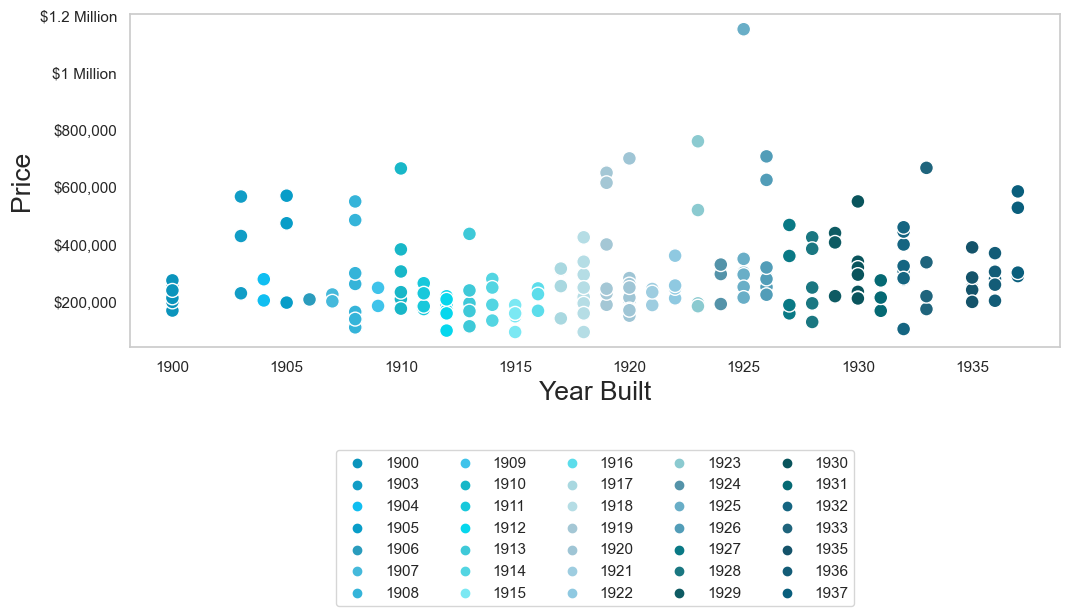

<ipython-input-407-199a341156b1>:34: UserWarning:

FixedFormatter should only be used together with FixedLocator



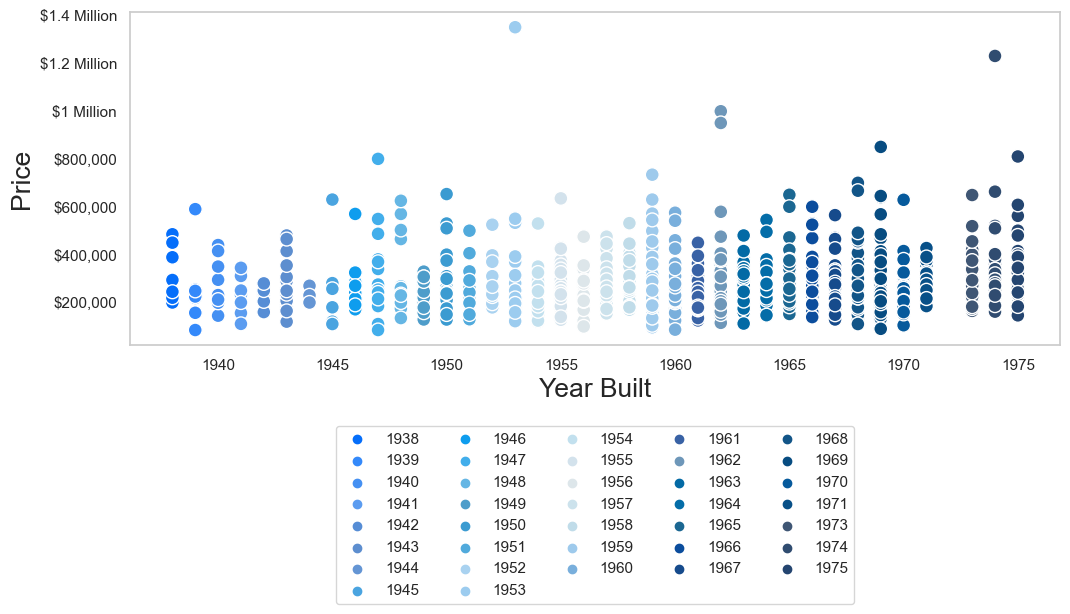

<ipython-input-407-199a341156b1>:57: UserWarning:

FixedFormatter should only be used together with FixedLocator



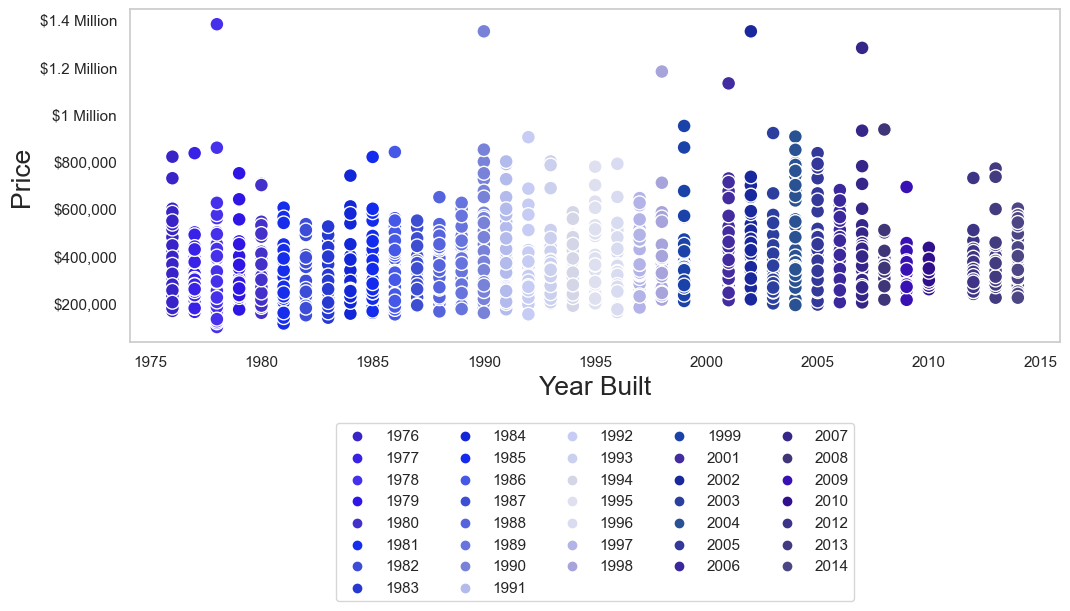

In [407]:
plt.subplot(3,1,1) #35 years in tottal
x = regressiondata44['Year_Built']
y = regressiondata44['Price']
data=regressiondata44
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata44, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui1)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
#plt.tight_layout(4)
plt.show()

#xticks=ax.xaxis.get_major_ticks()

plt.subplot(3,1,2)
x = regressiondata45['Year_Built']
y = regressiondata45['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata45, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui2)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
#plt.tight_layout(4)
plt.show()

#xticks=ax.xaxis.get_major_ticks(1930,1995)
#plt.xticks(np.arange(1930,1995)) 

plt.subplot(3,1,3)
sns.set(style="whitegrid")
x = regressiondata46['Year_Built']
y = regressiondata46['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata46, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui3)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
sns.set(style="whitegrid")
plt.gcf().set_size_inches(12, 15)
#plt.tight_layout(4)
plt.show()




#xticks=ax.xaxis.get_major_ticks(1930,1995)
#plt.xticks(np.arange(1930,1995)) 


In [569]:
train_df, test_df = train_test_split(regressiondata46, test_size=0.20, shuffle=False)

In [570]:
X_train, y_train = train_df[['Year_Built']], train_df[['Price']]
X_test, y_test = test_df[['Year_Built']], test_df[['Price']]

In [571]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [572]:
Quantile_regression3 = pd.DataFrame({'Year_Built': X_test.reset_index()['Year_Built'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [573]:
Quantile_regression3

,Year_Built,0.1,0.5,0.9,Price
0,1983,188350.977671,264976.169366,464965.532119,240000.0
1,1983,188350.977671,264976.169366,464965.532119,258500.0
2,1983,188350.977671,264976.169366,464965.532119,330000.0
3,1983,188350.977671,264976.169366,464965.532119,273500.0
4,1983,188350.977671,264976.169366,464965.532119,160000.0
...,...,...,...,...,...
537,1982,188350.977671,264976.169366,464965.532119,249000.0
538,1982,188350.977671,264976.169366,464965.532119,374000.0
539,1982,188350.977671,264976.169366,464965.532119,179950.0
540,1982,188350.977671,264976.169366,464965.532119,510000.0


In [579]:
melted_data = pd.melt(Quantile_regression3, id_vars=['Year_Built'])
melted_data = melted_data.dropna()
#melted_data = melted_data.drop(range(54,72))44
#melted_data = melted_data.drop(range(426,568))45
melted_data = melted_data.drop(range(1626,2168))
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Year_Built,Percentile,value
0,1983,0.1,188350.977671
1,1983,0.1,188350.977671
2,1983,0.1,188350.977671
3,1983,0.1,188350.977671
4,1983,0.1,188350.977671
...,...,...,...
1621,1982,0.9,464965.532119
1622,1982,0.9,464965.532119
1623,1982,0.9,464965.532119
1624,1982,0.9,464965.532119


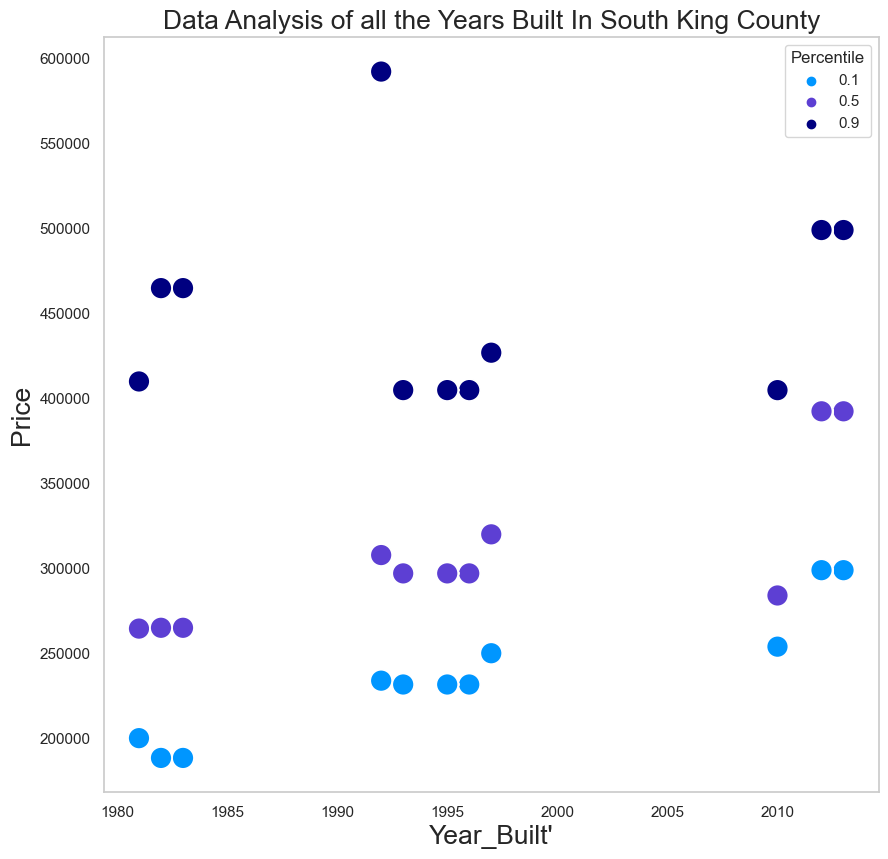

In [580]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#0096FF","#5D3FD3","#000080",]
ax =sns.scatterplot(data=melted_data, x="Year_Built",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Years Built In South King County',size=19)
plt.xlabel("Year_Built", size=19)
plt.ylabel("Price", size=19)
#ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         #'$1 Million','$1.2 Million','$1.4 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year_Built'")
plt.gcf().set_size_inches((10,10))

In [411]:
def YEAR_RENOVATED(YEAR):
    
    locations = house_info['Location'].tolist()

    year = house_info['Year Renoveted'].tolist()

    year_index = []
    for i,x in enumerate(year):
        if x == YEAR:year_index.append(i)

    year_southking = []
    for i in year_index:
        if locations[i] == 98092 : year_southking.append(i)
        elif locations[i] == 98002 : year_southking.append(i)
        elif locations[i] == 98001 : year_southking.append(i)
        elif locations[i] == 98070 : year_southking.append(i)
        elif locations[i] == 98038 : year_southking.append(i)
        elif locations[i] == 98023 : year_southking.append(i)
        elif locations[i] == 98003 : year_southking.append(i)
        elif locations[i] == 98010 : year_southking.append(i)
        elif locations[i] == 98022 : year_southking.append(i)
        elif locations[i] == 98198 : year_southking.append(i)
        elif locations[i] == 98188 : year_southking.append(i)
        elif locations[i] == 98148 : year_southking.append(i)
        elif locations[i] == 98042 : year_southking.append(i)
        elif locations[i] == 98032 : year_southking.append(i)
        elif locations[i] == 98031 : year_southking.append(i)
        elif locations[i] == 98030 : year_southking.append(i)

    price = house_info["Price"].tolist()

    price_southking = []
    for i in year_southking:price_southking.append(price[i])
    return(price_southking)

year_renovated = house_info["Year Renoveted"].value_counts().index.tolist()
yearrenov_Price_southking = []
for i in year_renovated:
    yearrenov_Price_southking.append(YEAR_RENOVATED(i))
yearrenov_Price_southking = sum(yearrenov_Price_southking, [])
len(yearrenov_Price_southking)

3650

In [412]:
def AMOUNT_YEAR_RENOVATED(AMOUNT_YEAR):
    locations = house_info['Location'].tolist()

    year_renovated = house_info["Year Renoveted"].tolist()
    X_value = []
    year_index = []
    for i,x in enumerate(year_renovated):
        if x == AMOUNT_YEAR:year_index.append(i)

    for i in year_index:
        if locations[i] == 98092 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98002 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98001 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98070 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98038 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98023 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98003 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98010 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98022 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98198: X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98188 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98148 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98042 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98032 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98031 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98030 : X_value.append(AMOUNT_YEAR)
    return X_value
year = house_info["Year Renoveted"].value_counts().index.tolist()
year_southking = []
for i in year:
    year_southking.append(AMOUNT_YEAR_RENOVATED(i))
year_southking= sum(year_southking, [])
len(year_southking)

3650

In [413]:
regressiondata5 = pd.DataFrame({'Year Renoveted':year_southking,
                                'Price':yearrenov_Price_southking})
regressiondata5[3562:3649]
re5 = regressiondata5[3562:3649]
re5

,Year Renoveted,Price
3562,2014.0,245990.0
3563,2014.0,199990.0
3564,2014.0,232000.0
3565,2014.0,225000.0
3566,2014.0,209000.0
...,...,...
3644,1960.0,160000.0
3645,1974.0,160000.0
3646,1957.0,168000.0
3647,1962.0,425000.0


In [416]:
flatui = [ '#4F617B','#425777','#4C5A6F','#133262','#07306E','#163360','#2A446B','#314767','#0E3879',
          '#09306C','#063277',
    
    
         '#0565F9','#146BF1','#1C6CE8','#246BDB','#367EEC','#2A6ED7','#367EEC','#3272D7','#2F76E4',
          '#2F72DA','#347DEE',
         
          '#6F9CE3','#648DCD','#557BB6','#6C91CB','#708FBE','#80A5DF','#79A6EA','#6B88B5','#7096D1',
          '#7E9FD2','#86A9E0',
          
         '#B5C6E0','#B8CDED','#95ABCE','#9EBAE6','#9FAEC5','#BDC7D5','#D4D9E0','#A6ACB5','#92969D',
          '#707E94','#677D9E']
len(flatui)

44

<ipython-input-417-7229fbf63ef6>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



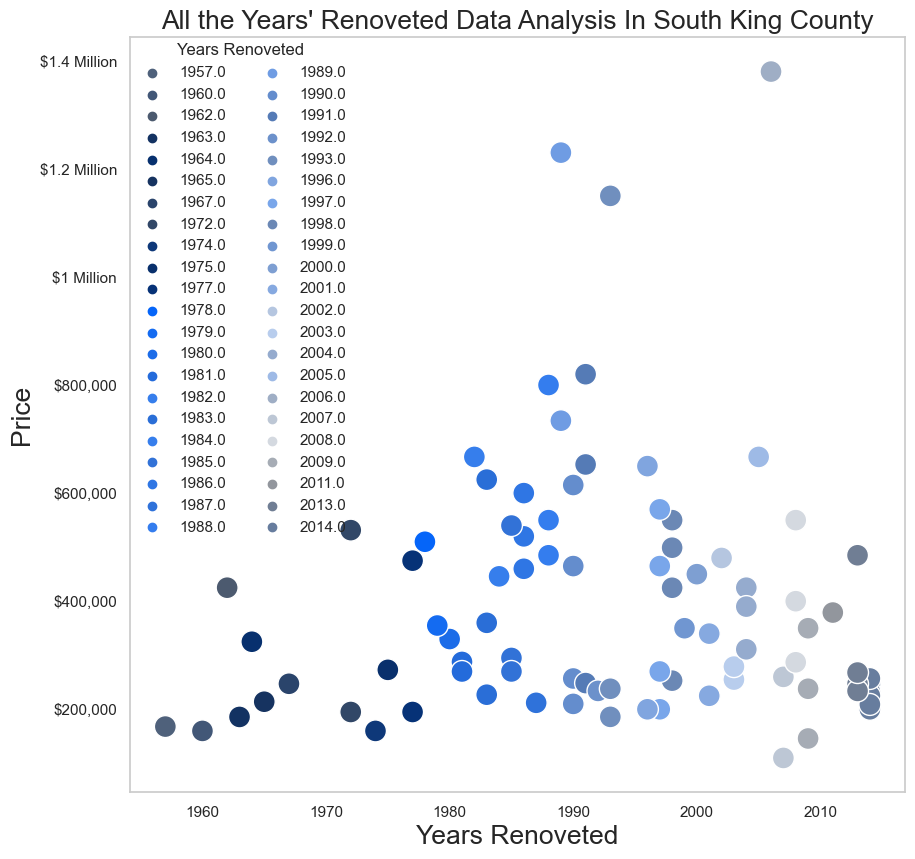

In [417]:
x = regressiondata5[3562:3649]['Year Renoveted']
y = regressiondata5[3562:3649]['Price']
#plt.xticks(np.arange(1900,2000))
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=re5, x=x, y=y,s=250, linewidth = 1,
                    hue='Year Renoveted',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In South King County',size=19)
plt.xlabel("Years Renoveted", size=19)
plt.legend(title='Years Renoveted')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.gcf().set_size_inches((10,10))
plt.legend( loc='upper left', borderaxespad=0,title="Years Renoveted",
          frameon=False, ncol=2)
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [418]:
re6 = regressiondata5[:3562]
re6

,Year Renoveted,Price
0,0.0,257500.0
1,0.0,291850.0
2,0.0,323000.0
3,0.0,189000.0
4,0.0,230000.0
...,...,...
3557,0.0,270000.0
3558,0.0,347500.0
3559,0.0,350000.0
3560,0.0,541800.0


In [421]:
def CONDITION(LEVEL_CONDITION):
    
    locations = house_info['Location'].tolist()

    condition_level = house_info['Condition'].tolist()

    condition_index = []
    for i,x in enumerate(condition_level):
        if x == LEVEL_CONDITION:condition_index.append(i)

    level_southking = []
    for i in condition_index:
        if locations[i] == 98092 : level_southking.append(i)
        elif locations[i] == 98002 : level_southking.append(i)
        elif locations[i] == 98001 : level_southking.append(i)
        elif locations[i] == 98070 : level_southking.append(i)
        elif locations[i] == 98038 : level_southking.append(i)
        elif locations[i] == 98023 : level_southking.append(i)
        elif locations[i] == 98003 : level_southking.append(i)
        elif locations[i] == 98010 : level_southking.append(i)
        elif locations[i] == 98022 : level_southking.append(i)
        elif locations[i] == 98198 : level_southking.append(i)
        elif locations[i] == 98188 : level_southking.append(i)
        elif locations[i] == 98148 : level_southking.append(i)
        elif locations[i] == 98042 : level_southking.append(i)
        elif locations[i] == 98032 : level_southking.append(i)
        elif locations[i] == 98031 : level_southking.append(i)
        elif locations[i] == 98030 : level_southking.append(i)

    price = house_info["Price"].tolist()

    price_southking = []
    for i in level_southking:price_southking.append(price[i])
    return(price_southking)

condition_level = house_info["Condition"].value_counts().index.tolist()
level_southking = []
for i in condition_level:
    level_southking.append(CONDITION(i))
level_southking= sum(level_southking, [])
len(level_southking)

4403

In [422]:
def AMOUNT_LEVEL(AMOUNT_LEVEL):
    locations = house_info['Location'].tolist()

    condtions = house_info["Condition"].tolist()
    X_value = []
    level_index = []
    for i,x in enumerate(condtions):
        if x == AMOUNT_LEVEL:level_index.append(i)

    for i in level_index:
        if locations[i] == 98092 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98002 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98001 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98070 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98038 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98023 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98003 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98010 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98022 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98198: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98188 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98148 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98042 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98032 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98031 : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == 98030 : X_value.append(AMOUNT_LEVEL)
    return X_value
level = house_info["Condition"].value_counts().index.tolist()
condtition_level_southking = []
for i in level:
    condtition_level_southking.append(AMOUNT_LEVEL(i))
condtition_level_southking= sum(condtition_level_southking, [])
len(condtition_level_southking)

4403

In [423]:
regressiondata6 = pd.DataFrame({'Condition Level':condtition_level_southking,
                                'Price':level_southking})
regressiondata6.head

<bound method NDFrame.head of       Condition Level     Price
0                   3  257500.0
1                   3  291850.0
2                   3  323000.0
3                   3  285000.0
4                   3  252700.0
...               ...       ...
4398                2  246500.0
4399                2  235000.0
4400                1  105500.0
4401                1  445000.0
4402                1  150000.0

[4403 rows x 2 columns]>

In [428]:
flatui = ['#6750A3','#5032A1','#4C20C3','#4D18DB','#4907F9']

<ipython-input-429-ba1ce95206d3>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



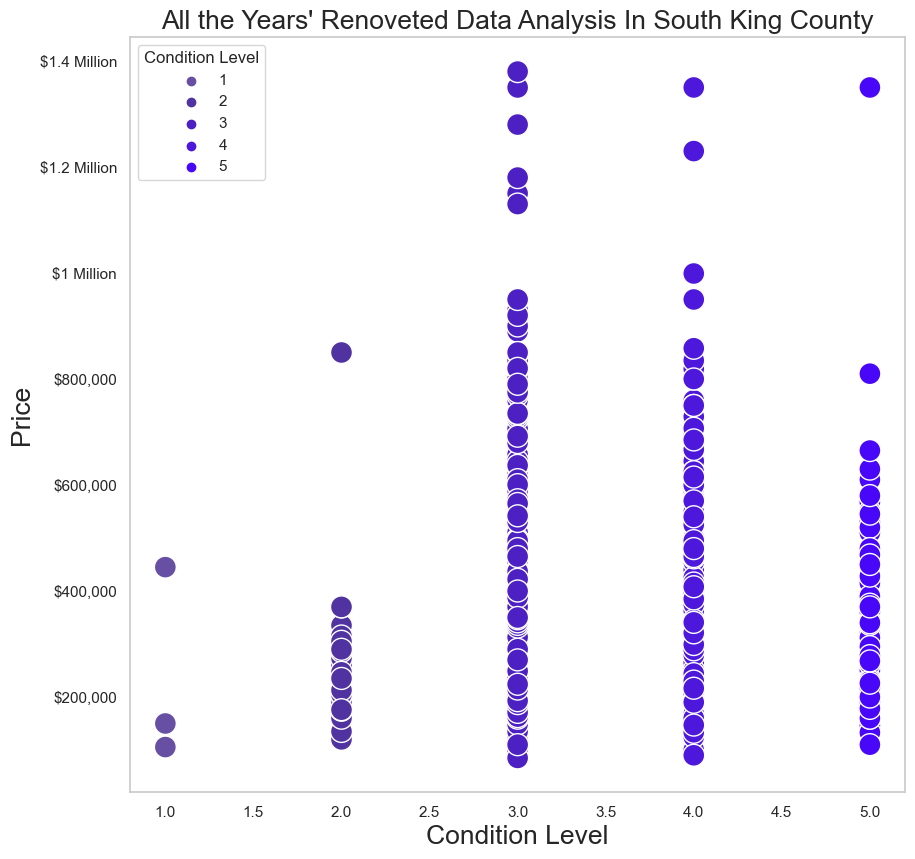

In [429]:
x = regressiondata6['Condition Level']
y = regressiondata6['Price']
#plt.xticks(np.arange(1900,2000))
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata6, x=x, y=y,s=250, linewidth = 1,
                    hue='Condition Level',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In South King County',size=19)
plt.xlabel("Condition Level", size=19)
plt.legend(title='Condition Level')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                         '$1 Million','$1.2 Million','$1.4 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()